### Udacity Data Science Nanodegree
### Project 1: Writing a Data Scientist Blog Post
---

# Notebook 3 of 4: London Airbnb

# Business Questions 2 and 3: Host and Star rating analysis
## by Juanita Smith


- [Introduction](#intro)
- [Data gathering](#getdata)
- [Host Analysis: How does host excellence influence price ?](#hosts)
- [What effect does star ratings have on rental price ?](#stars)
- [Conclusions](#conclusions)
- [References](#references)
- [Submission](#submission)

<a id='intro'></a>
<span style="color:blue; font-size:30px; line-height:40px; font-family: Calibri;">Introduction</span>

This notebook focus an answering business questions 2 and 3:

<span style="color:blue; font-size:20px; line-height:20px; font-family: Calibri;">2) Host Analysis: How does **host excellence** influence price ?</span>
> - Super hosts seems to describe their properties better, how does this effect price and availability ?


<span style="color:blue; font-size:20px; line-height:20px; font-family: Calibri;">3) What effect does **star ratings** have on rental price ?</span>
> - Would a 5-star vs 3-star listing in the same location cost more ?


This notebook will use the cleaned files created by running notebook 1 and 2 in sequence. Enhanced listing file are stored in `data\clean\listing_enhanced_060623.pkl`

Refer to the README file for initial data download instructions and metadata descriptions.

In [1]:
# automatically check PEP8 compliance
%load_ext pycodestyle_magic

In [2]:
# to do PEP8 check for all code cells
%pycodestyle_on

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import seaborn as sns

# Import custom modules
import project1_data_science_blog.src.visuals as vs

# suppress matplotlib user warnings
import warnings

# Make your Jupyter Notebook wider
from IPython.display import display, HTML

In [4]:
# environment settings
# display all columns and rows during visual inspection
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Make your Jupyter Notebook wider
display(HTML('<style>.container { width:80% !important; }</style>'))

# use high resolution if this project is run on an Apple device
%config InlineBackend.figure_format = 'retina'

# suppress matplotlib user warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# set plots to be embedded inline
%matplotlib inline

In [5]:
# set default plot formatting and colors
BASE_COLOR, BASE_HIGHLIGHT_INTENSE, BASE_HIGHLIGHT, BASE_COMPLIMENTARY, \
    BASE_GREY, BASE_COLOR_SUB1, \
    BASE_COLOR_SUB2, SYMBOLS = vs.set_plot_defaults()

In [6]:
percentiles = [0.025, 0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.975, 0.99, 0.999]

In [7]:
# default file paths
date_stamp = '060623'
# date_stamp = '060923'
FILE_PATH_CLEAN = '../data/clean/'
FILE_NAME_CLEAN = FILE_PATH_CLEAN + \
                  'listing_clean_' + \
                  date_stamp + \
                  '.pkl'

FILE_NAME_ENHANCED = FILE_PATH_CLEAN + \
                     'listing_enhanced_' + \
                     date_stamp + \
                     '.pkl'

In [8]:
def annotate_bars(ax=None, fmt='.2f', **kwargs):
    """
    Add custom annotation to bar plots.

    Print the height of the bar as annotation with '%' as suffix

    Example 86.8 becomes 86.8%

    Args:
        ax (axis object) - plot to annoticate
        fmt (string) - formatting of numerical numbers
    """

    ax = plt.gca() if ax is None else ax
    for p in ax.patches:
        ax.annotate('{{:{:s}}}%'.format(fmt).format(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center',
                    va='center',
                    **kwargs)

In [9]:
def custom_mean_line(y, **kwargs):
    """ Print horizontal mean line on plots using y.mean(). """

    ym = y.mean()
    plt.axhline(ym,
                color='r',
                linestyle="dashed",
                linewidth=0.8)

    plt.annotate(f"mean: £{y.mean():.0f}", xy=(1, ym),
                 xycoords=plt.gca().get_yaxis_transform(),
                 ha="left",
                 fontsize=8,
                 color='r',
                 weight='light')

<a id='getdata'></a>
<span style="color:blue; font-size:30px; line-height:40px; font-family: Calibri;">Gather Data</span>

In [10]:
# load the enhanced listing file
listings = pd.read_pickle(FILE_NAME_ENHANCED)

<a id='hosts'></a>
<span style="color:blue; font-size:30px; line-height:40px; font-family: Calibri;">Host Analysis: How does host excellence influence price ?</span>

In [11]:
# features of interest to analyse hosts
host_features = ['host_id', 'host_response_time', 'host_response_rate',
                 'host_acceptance_rate', 'host_is_superhost',
                 'host_identity_verified', 'number_of_reviews_ltm',
                 'number_of_reviews', 'review_scores_rating',
                 'host_years_active', 'host_has_about', 'host_has_profile_pic',
                 'host_has_neighborhood_overview', 'is_business', 'price_mean',
                 'room_type', 'property_type', 'availability_365',
                 'availability_30', 'availability_60']

In [12]:
host = listings[host_features].copy()
host.sample(5)

host_id  host_response_time  host_response_rate  \
32677  258154594  within a few hours                  88   
8652    67541997                 NaN                   0   
32899   47168742  within a few hours                 100   
9752    57991631        within a day                 100   
48691  183088797                 NaN                   0   

       host_acceptance_rate  host_is_superhost  host_identity_verified  \
32677                    66              False                    True   
8652                      0              False                    True   
32899                   100               True                    True   
9752                     74              False                    True   
48691                     0              False                    True   

       number_of_reviews_ltm  number_of_reviews  review_scores_rating  \
32677                      0                  0                   NaN   
8652                       0                  0                   NaN   
32899                     10                 20                  4.70   
9752                       2                 11                  4.73   
48691                     21                 21                  4.95   

       host_years_active  host_has_about  host_has_profile_pic  \
32677                  4            True                  True   
8652                   7           False                  True   
32899                  8           False                  True   
9752                   7            True                  True   
48691                  5            True                  True   

       host_has_neighborhood_overview  is_business  price_mean  \
32677                            True        False        1570   
8652                            False        False          34   
32899                            True        False         249   
9752                             True        False          60   
48691                            True        False         180   

             room_type                property_type  availability_365  \
32677     Private room  Private room in rental unit               364   
8652      Private room  Private room in rental unit                 0   
32899  Entire home/apt                  Entire home                 9   
9752      Private room     Private room in bungalow                51   
48691  Entire home/apt                 Entire condo                10   

       availability_30  availability_60  
32677               29               59  
8652                 0                0  
32899                0                0  
9752                 4               25  
48691                2                3

In [13]:
# make sure datatypes were preserved from cleaning step
host.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 68923 entries, 0 to 69184
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         68923 non-null  int64  
 1   host_response_time              51806 non-null  object 
 2   host_response_rate              68923 non-null  int32  
 3   host_acceptance_rate            68923 non-null  int32  
 4   host_is_superhost               68923 non-null  bool   
 5   host_identity_verified          68923 non-null  bool   
 6   number_of_reviews_ltm           68923 non-null  int64  
 7   number_of_reviews               68923 non-null  int64  
 8   review_scores_rating            48640 non-null  float64
 9   host_years_active               68923 non-null  int64  
 10  host_has_about                  68923 non-null  bool   
 11  host_has_profile_pic            68923 non-null  bool   
 12  host_has_neighborhood_overview  68923

In [14]:
# not all hosts have reviews or response rates,
# for this analysis lets drop all missing data
host = host.dropna()
host.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40900 entries, 0 to 69077
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         40900 non-null  int64  
 1   host_response_time              40900 non-null  object 
 2   host_response_rate              40900 non-null  int32  
 3   host_acceptance_rate            40900 non-null  int32  
 4   host_is_superhost               40900 non-null  bool   
 5   host_identity_verified          40900 non-null  bool   
 6   number_of_reviews_ltm           40900 non-null  int64  
 7   number_of_reviews               40900 non-null  int64  
 8   review_scores_rating            40900 non-null  float64
 9   host_years_active               40900 non-null  int64  
 10  host_has_about                  40900 non-null  bool   
 11  host_has_profile_pic            40900 non-null  bool   
 12  host_has_neighborhood_overview  40900

In [15]:
# check for duplicated host data
host.host_id.duplicated().sum()

19339

>**Observation:** 
>  - Hosts can have multiple listings. For each listing, the same host data is duplicated. To do host analysis, these duplicates must first be removed.

In [16]:
# which host data are duplicated ?
host[host['host_id'] == 129230780]

host_id host_response_time  host_response_rate  host_acceptance_rate  \
28776  129230780     within an hour                  90                    76   
30385  129230780     within an hour                  90                    76   
31310  129230780     within an hour                  90                    76   
32005  129230780     within an hour                  90                    76   
32006  129230780     within an hour                  90                    76   
32015  129230780     within an hour                  90                    76   
32017  129230780     within an hour                  90                    76   
32026  129230780     within an hour                  90                    76   
32028  129230780     within an hour                  90                    76   
32038  129230780     within an hour                  90                    76   
32042  129230780     within an hour                  90                    76   
32043  129230780     within an hour                  90                    76   
32044  129230780     within an hour                  90                    76   
32054  129230780     within an hour                  90                    76   
32060  129230780     within an hour                  90                    76   
32061  129230780     within an hour                  90                    76   
33077  129230780     within an hour                  90                    76   
33094  129230780     within an hour                  90                    76   
33098  129230780     within an hour                  90                    76   
33100  129230780     within an hour                  90                    76   
33828  129230780     within an hour                  90                    76   
34096  129230780     within an hour                  90                    76   
35458  129230780     within an hour                  90                    76   
37106  129230780     within an hour                  90                    76   
40275  129230780     within an hour                  90                    76   
40293  129230780     within an hour                  90                    76   
40302  129230780     within an hour                  90                    76   
40415  129230780     within an hour                  90                    76   
40423  129230780     within an hour                  90                    76   
40549  129230780     within an hour                  90                    76   
40626  129230780     within an hour                  90                    76   
40628  129230780     within an hour                  90                    76   
40924  129230780     within an hour                  90                    76   
41776  129230780     within an hour                  90                    76   
41784  129230780     within an hour                  90                    76   
41790  129230780     within an hour                  90                    76   
41808  129230780     within an hour                  90                    76   
41810  129230780     within an hour                  90                    76   
41823  129230780     within an hour                  90                    76   
42250  129230780     within an hour                  90                    76   
42278  129230780     within an hour                  90                    76   
43264  129230780     within an hour                  90                    76   
43286  129230780     within an hour                  90                    76   
43368  129230780     within an hour                  90                    76   
43386  129230780     within an hour                  90                    76   
48645  129230780     within an hour                  90                    76   
48649  129230780     within an hour                  90                    76   
48651  129230780     within an hour                  90                    76   
48655  129230780     within an hour     

In [17]:
# convert host_response_time from categorical to numeric column
host = pd.get_dummies(host,
                      prefix=None,
                      prefix_sep='_',
                      dummy_na=False,
                      columns=['host_response_time'],
                      sparse=False,
                      drop_first=False,
                      dtype=None)
host.head(2)

host_id  host_response_rate  host_acceptance_rate  host_is_superhost  \
0   757377                  90                    68              False   
1    54730                 100                    78              False   

   host_identity_verified  number_of_reviews_ltm  number_of_reviews  \
0                    True                     10                175   
1                    True                     15                 41   

   review_scores_rating  host_years_active  host_has_about  \
0                  4.71                 12            True   
1                  4.80                 14            True   

   host_has_profile_pic  host_has_neighborhood_overview  is_business  \
0                  True                            True        False   
1                  True                            True        False   

   price_mean     room_type                property_type  availability_365  \
0          70  Private room    Private room in townhouse                67   
1          79  Private room  Private room in rental unit               353   

   availability_30  availability_60  host_response_time_a few days or more  \
0               10               37                                  False   
1               23               48                                  False   

   host_response_time_within a day  host_response_time_within a few hours  \
0                            False                                   True   
1                            False                                  False   

   host_response_time_within an hour  
0                              False  
1                               True

In [18]:
# enhance columns of interest
remove_list = ['host_id', 'host_response_time',
               'room_type', 'property_type']

host_features_reduced = [i for i in host_features
                         if i not in remove_list]
host_features_reduced

['host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_identity_verified',
 'number_of_reviews_ltm',
 'number_of_reviews',
 'review_scores_rating',
 'host_years_active',
 'host_has_about',
 'host_has_profile_pic',
 'host_has_neighborhood_overview',
 'is_business',
 'price_mean',
 'availability_365',
 'availability_30',
 'availability_60']

In [19]:
# summarize host data and at same time get rid of duplicated data
host_grouped = host.groupby(['host_id'], as_index=False) \
    .mean(numeric_only=True)
host_grouped.head(3)

host_id  host_response_rate  host_acceptance_rate  host_is_superhost  \
0     4775               100.0                  96.0                0.0   
1     4879               100.0                  33.0                0.0   
2     6774               100.0                  92.0                0.0   

   host_identity_verified  number_of_reviews_ltm  number_of_reviews  \
0                     1.0              26.428571         127.000000   
1                     1.0               3.000000           3.000000   
2                     1.0               8.500000          23.333333   

   review_scores_rating  host_years_active  host_has_about  \
0              4.792857               15.0             1.0   
1              4.670000               15.0             1.0   
2              4.776667               14.0             1.0   

   host_has_profile_pic  host_has_neighborhood_overview  is_business  \
0                   1.0                        1.000000          0.0   
1                   1.0                        1.000000          0.0   
2                   1.0                        0.833333          0.0   

   price_mean  availability_365  availability_30  availability_60  \
0  154.714286        210.142857         4.428571        10.000000   
1  175.000000        364.000000        29.000000        59.000000   
2  145.000000         74.000000         0.666667         3.666667   

   host_response_time_a few days or more  host_response_time_within a day  \
0                                    0.0                              0.0   
1                                    0.0                              0.0   
2                                    0.0                              0.0   

   host_response_time_within a few hours  host_response_time_within an hour  
0                                    0.0                                1.0  
1                                    1.0                                0.0  
2                                    0.0                                1.0

In [20]:
# make sure host data are summarized correctly
host_grouped[host_grouped['host_id'] == 129230780]

host_id  host_response_rate  host_acceptance_rate  host_is_superhost  \
13243  129230780                90.0                  76.0                0.0   

       host_identity_verified  number_of_reviews_ltm  number_of_reviews  \
13243                     1.0                1.87013            2.38961   

       review_scores_rating  host_years_active  host_has_about  \
13243              3.569351                6.0             1.0   

       host_has_profile_pic  host_has_neighborhood_overview  is_business  \
13243                   1.0                        0.961039          1.0   

        price_mean  availability_365  availability_30  availability_60  \
13243  1550.168831        279.376623        16.649351        40.103896   

       host_response_time_a few days or more  host_response_time_within a day  \
13243                                    0.0                              0.0   

       host_response_time_within a few hours  \
13243                                    0.0   

       host_response_time_within an hour  
13243                                1.0

In [21]:
# how many unique hosts will we analyze ?
host_grouped.shape

(21561, 21)

In [22]:
# check that no more duplicates exist
host_grouped.host_id.duplicated().sum()

0

## Host: Univariate Analysis

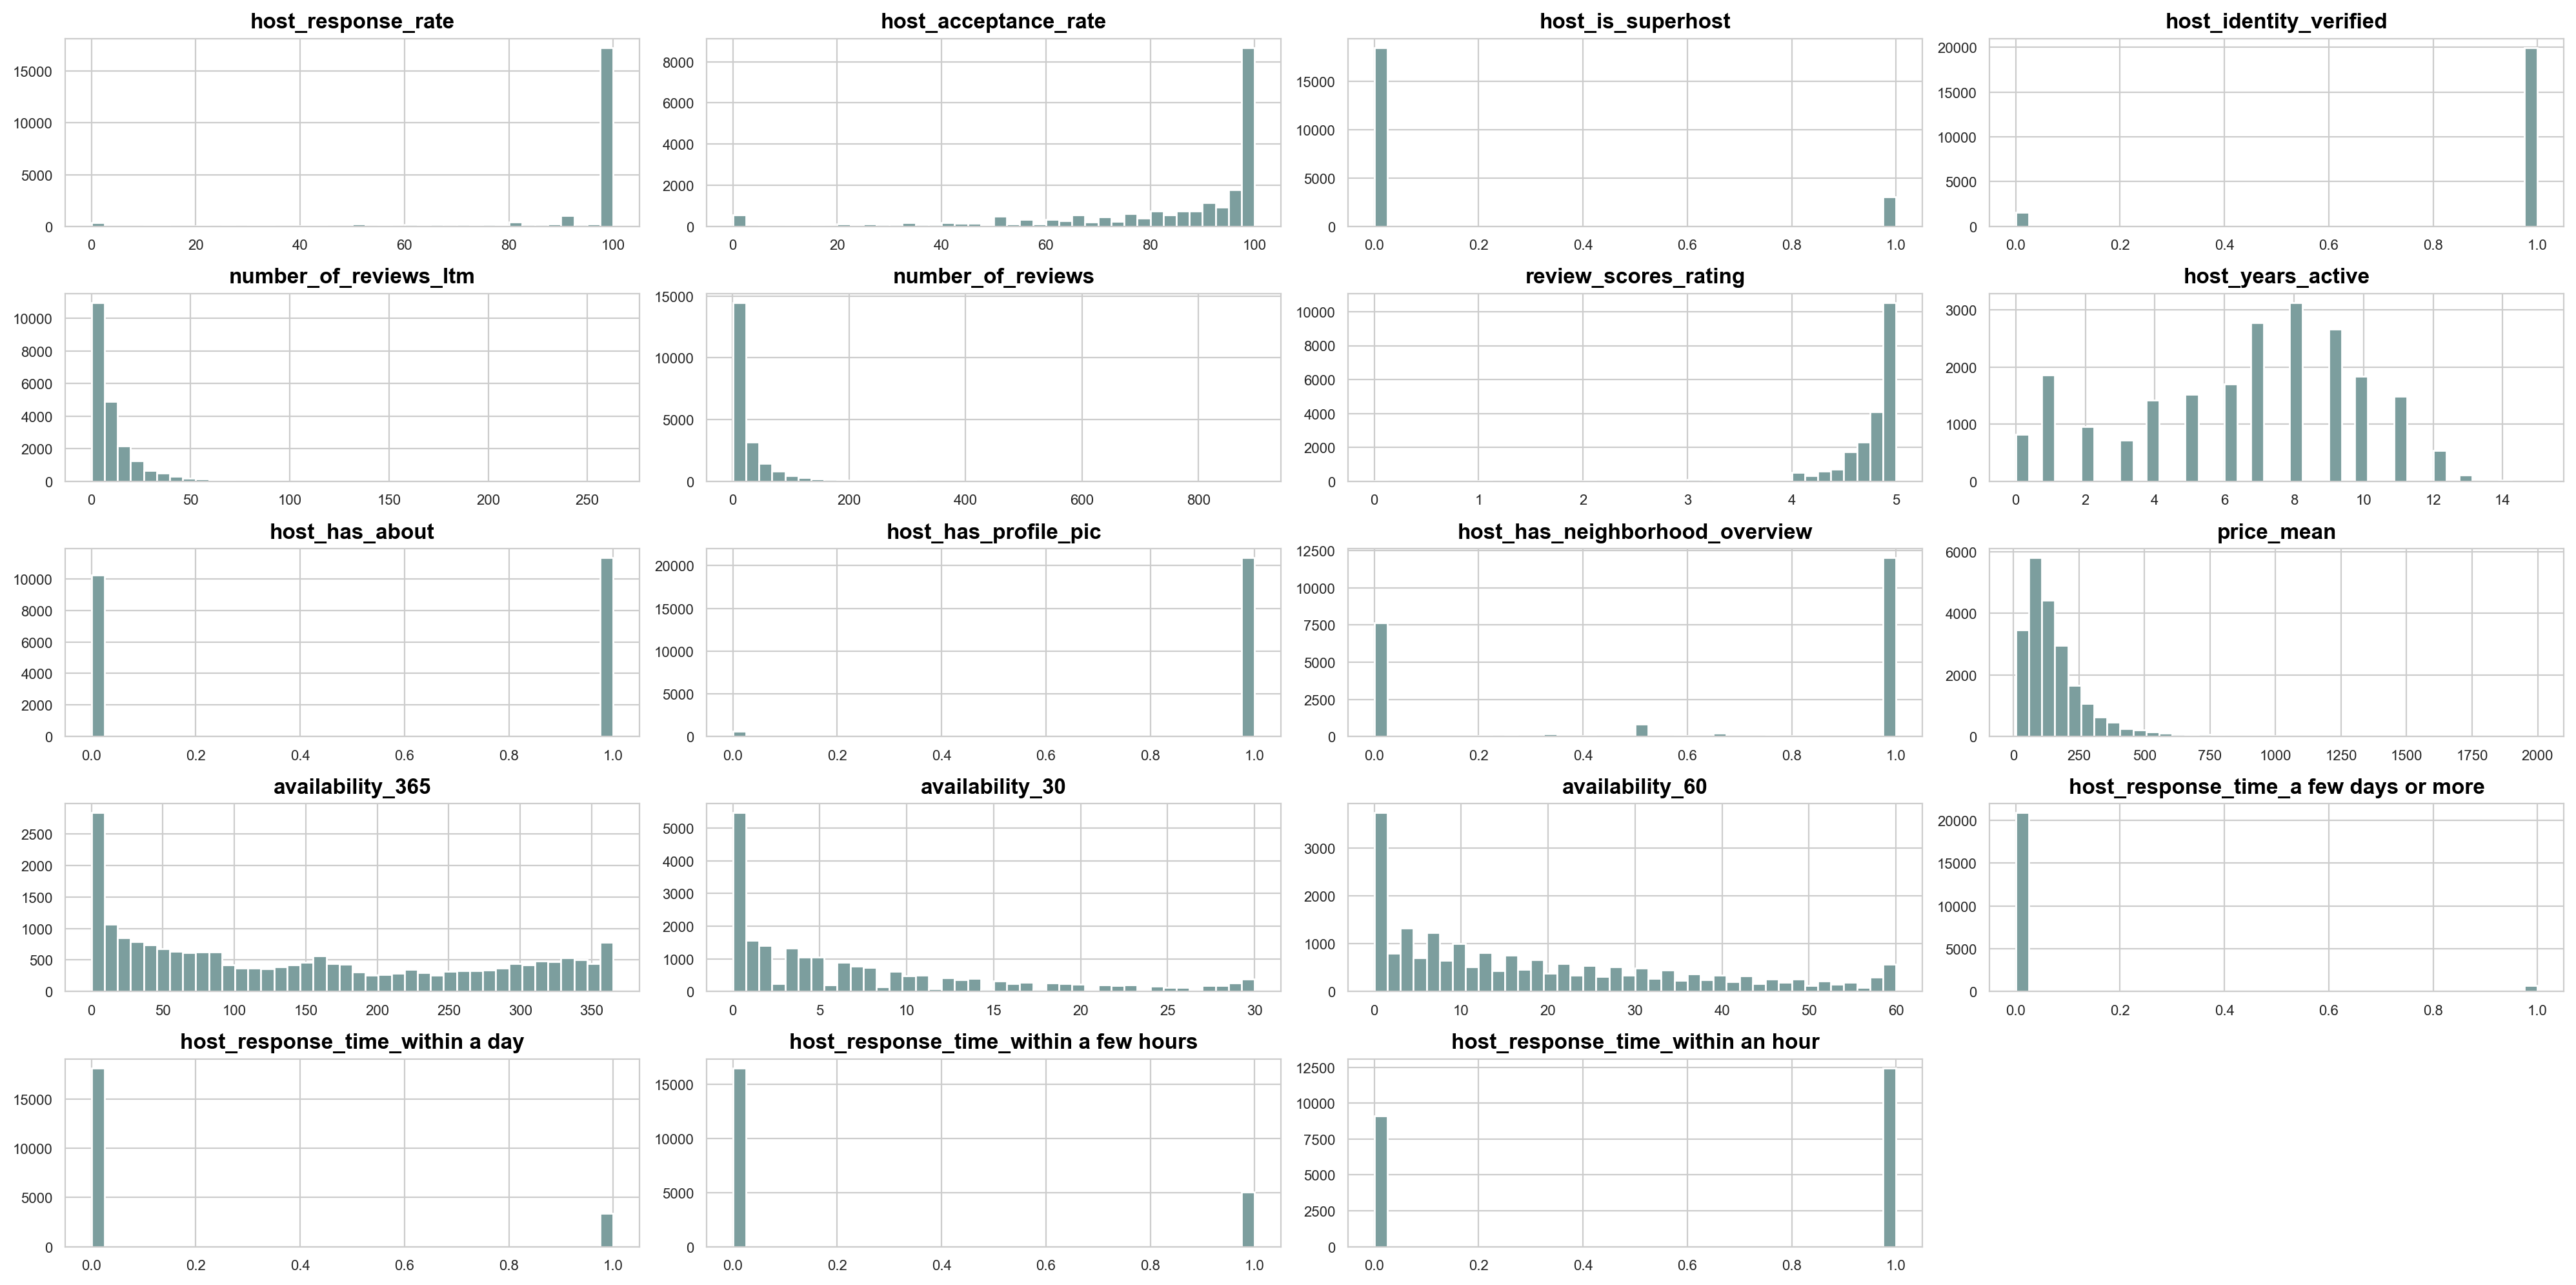

In [23]:
# get a general idea of numeric feature distributions
pd.plotting.hist_frame(
    host_grouped.drop(['host_id', 'is_business'], axis=1),
    figsize=(20, 10),
    bins=40,
    color=BASE_COLOR)
plt.tight_layout()

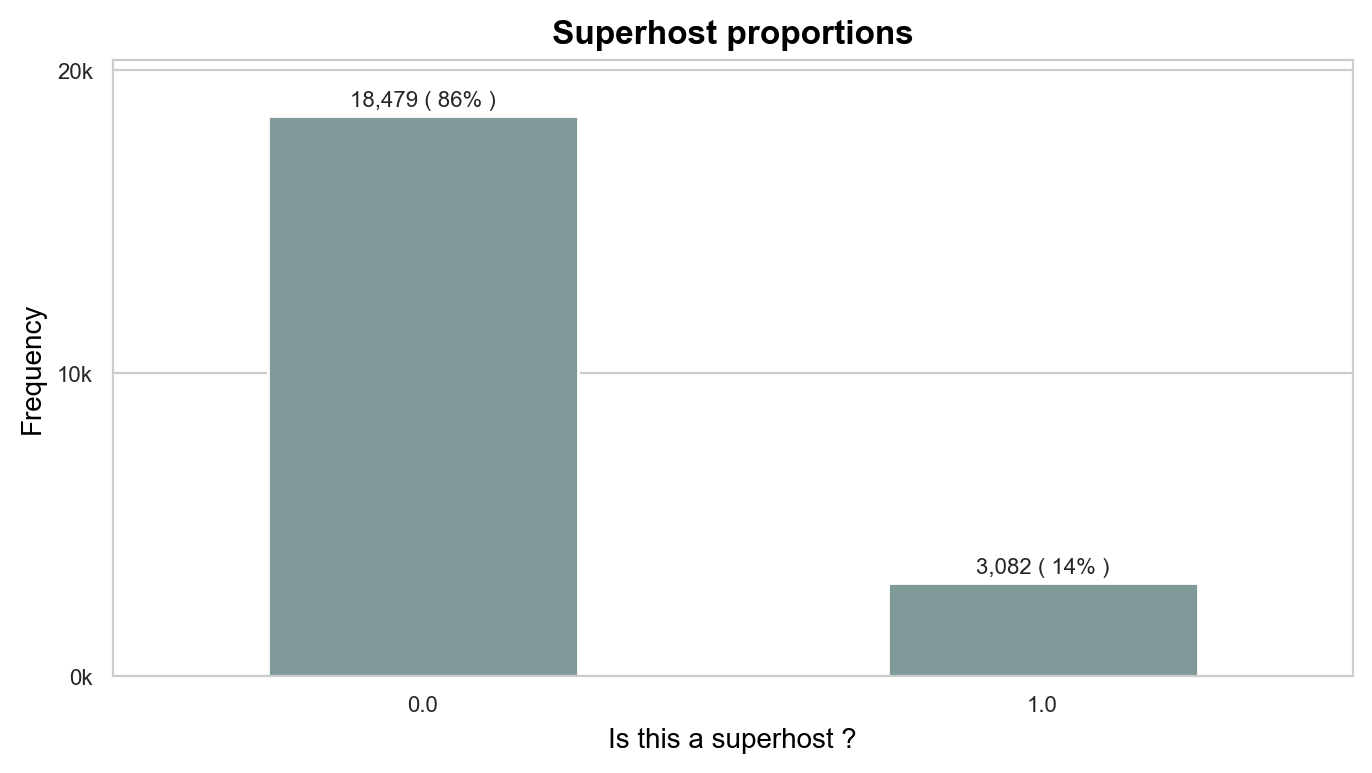

In [24]:
# plot proportion of super hosts
yticks = np.arange(0, host_grouped.shape[0]+1000, 10000)
ylabels = ['{:,.0f}k'.format(tick/1000) for tick in yticks]

total = host_grouped.host_is_superhost.count()
plt.figure(figsize=(8, 4))
data = host_grouped['host_is_superhost'].value_counts()
ax = sns.barplot(x=data.index, y=data, width=0.5, color=BASE_COLOR)

for c in ax.containers:
    labels = [f'{x:,.0f} ( {x / total * 100:,.0f}% )' for x in c.datavalues]
    ax.bar_label(c, labels, padding=2)

ax.margins(y=0.1)

plt.yticks(yticks, ylabels)
plt.xlabel('Is this a superhost ?')
plt.ylabel('Frequency')
plt.title('Superhost proportions')
plt.show()

> **Observations**: 14% of hosts are superhosts

## Host: Bi/Multivariate Analysis

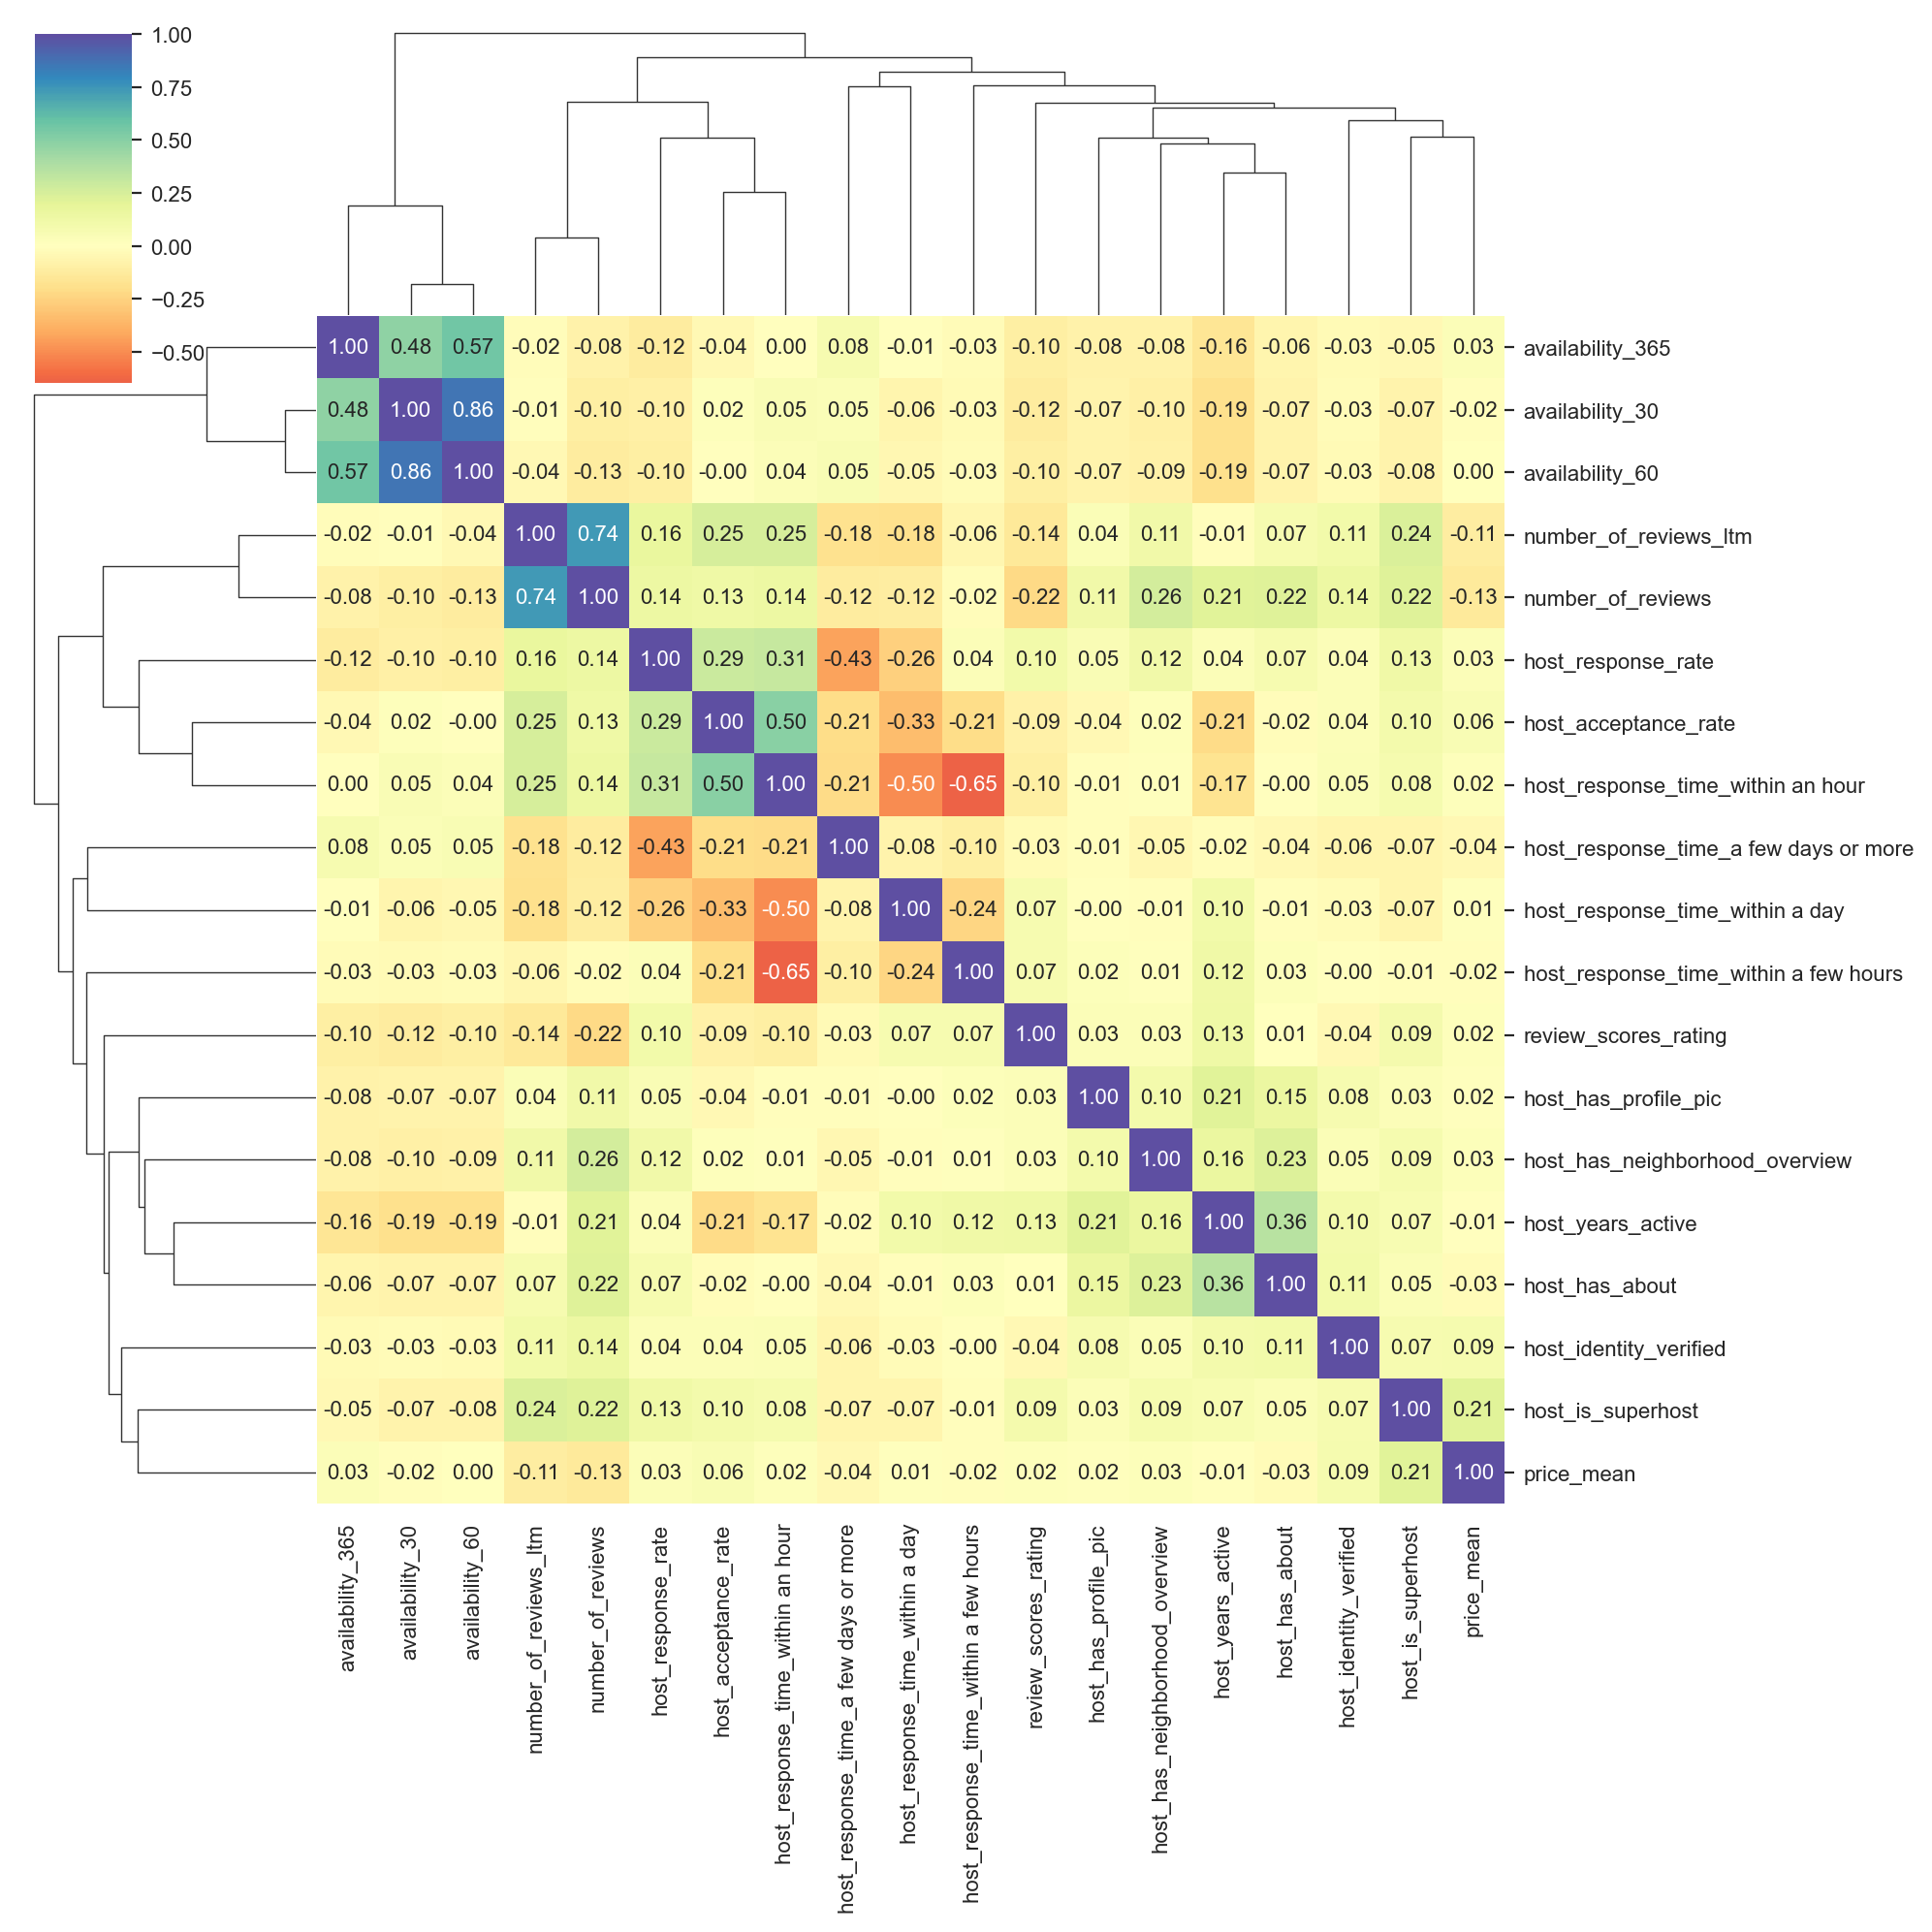

In [25]:
# explore relationship between features, focusing on the superhosts column
sns.clustermap(
    host_grouped.drop(
        ['host_id', 'is_business'], axis=1).corr(method='spearman'),
    cmap="Spectral",
    center=0,
    annot=True,
    fmt='.2f')
plt.show()

> **Observations**:
> Focusing especially on the `host_is_superhost` column:
> - There is a slight positive correlation between superhosts and price, does this mean superhosts charge more ?
> - Superhosts have a positive correlation with number of reviews, which means they have higher review scores

#### Which proportion of superhosts are running a business ?

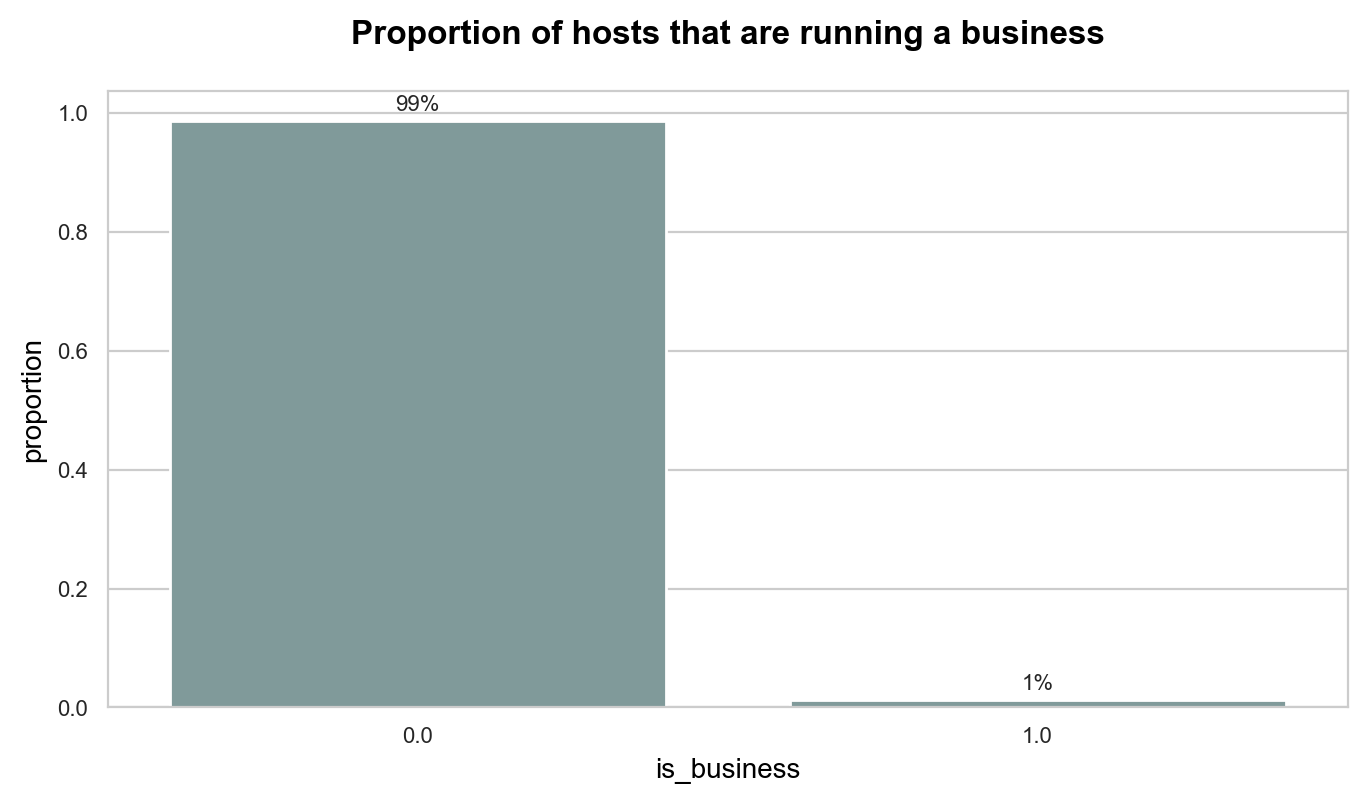

In [26]:
superhosts = host_grouped[host_grouped['host_is_superhost'] > 0]

ax = sns.barplot(superhosts['is_business'].value_counts(normalize=True),
                 color=BASE_COLOR)

for c in ax.containers:
    labels = [f'{x * 100:,.0f}%' for x in c.datavalues]
    ax.bar_label(c, labels, padding=2)

plt.title('Proportion of hosts that are running a business', y=1.05)
plt.show()

>**Observation**: All superhosts are individuals

As no superhosts are running a business, drop business hosts, they were already analysed in notebook 1 and causes abnormal high price hikes

In [27]:
# As no superhosts are running a business
host_grouped = host_grouped.query('is_business == False')
host = host.query('is_business == False')
host_grouped.head()

host_id  host_response_rate  host_acceptance_rate  host_is_superhost  \
0     4775               100.0                  96.0                0.0   
1     4879               100.0                  33.0                0.0   
2     6774               100.0                  92.0                0.0   
3    10657                90.0                  97.0                0.0   
4    23386               100.0                   0.0                0.0   

   host_identity_verified  number_of_reviews_ltm  number_of_reviews  \
0                     1.0              26.428571         127.000000   
1                     1.0               3.000000           3.000000   
2                     1.0               8.500000          23.333333   
3                     1.0               8.500000          37.500000   
4                     1.0               0.000000           7.000000   

   review_scores_rating  host_years_active  host_has_about  \
0              4.792857               15.0             1.0   
1              4.670000               15.0             1.0   
2              4.776667               14.0             1.0   
3              4.770000               14.0             1.0   
4              5.000000               14.0             1.0   

   host_has_profile_pic  host_has_neighborhood_overview  is_business  \
0                   1.0                        1.000000          0.0   
1                   1.0                        1.000000          0.0   
2                   1.0                        0.833333          0.0   
3                   1.0                        1.000000          0.0   
4                   1.0                        0.000000          0.0   

   price_mean  availability_365  availability_30  availability_60  \
0  154.714286        210.142857         4.428571        10.000000   
1  175.000000        364.000000        29.000000        59.000000   
2  145.000000         74.000000         0.666667         3.666667   
3  119.000000         70.000000         0.500000         6.000000   
4  195.000000        288.000000         0.000000         0.000000   

   host_response_time_a few days or more  host_response_time_within a day  \
0                                    0.0                              0.0   
1                                    0.0                              0.0   
2                                    0.0                              0.0   
3                                    0.0                              0.0   
4                                    0.0                              0.0   

   host_response_time_within a few hours  host_response_time_within an hour  
0                                    0.0                                1.0  
1                                    1.0                                0.0  
2                                    0.0                                1.0  
3                                    1.0                                0.0  
4                                    0.0                                1.0

#### What makes a superhost great ?

Compare features of interest between superhosts and others

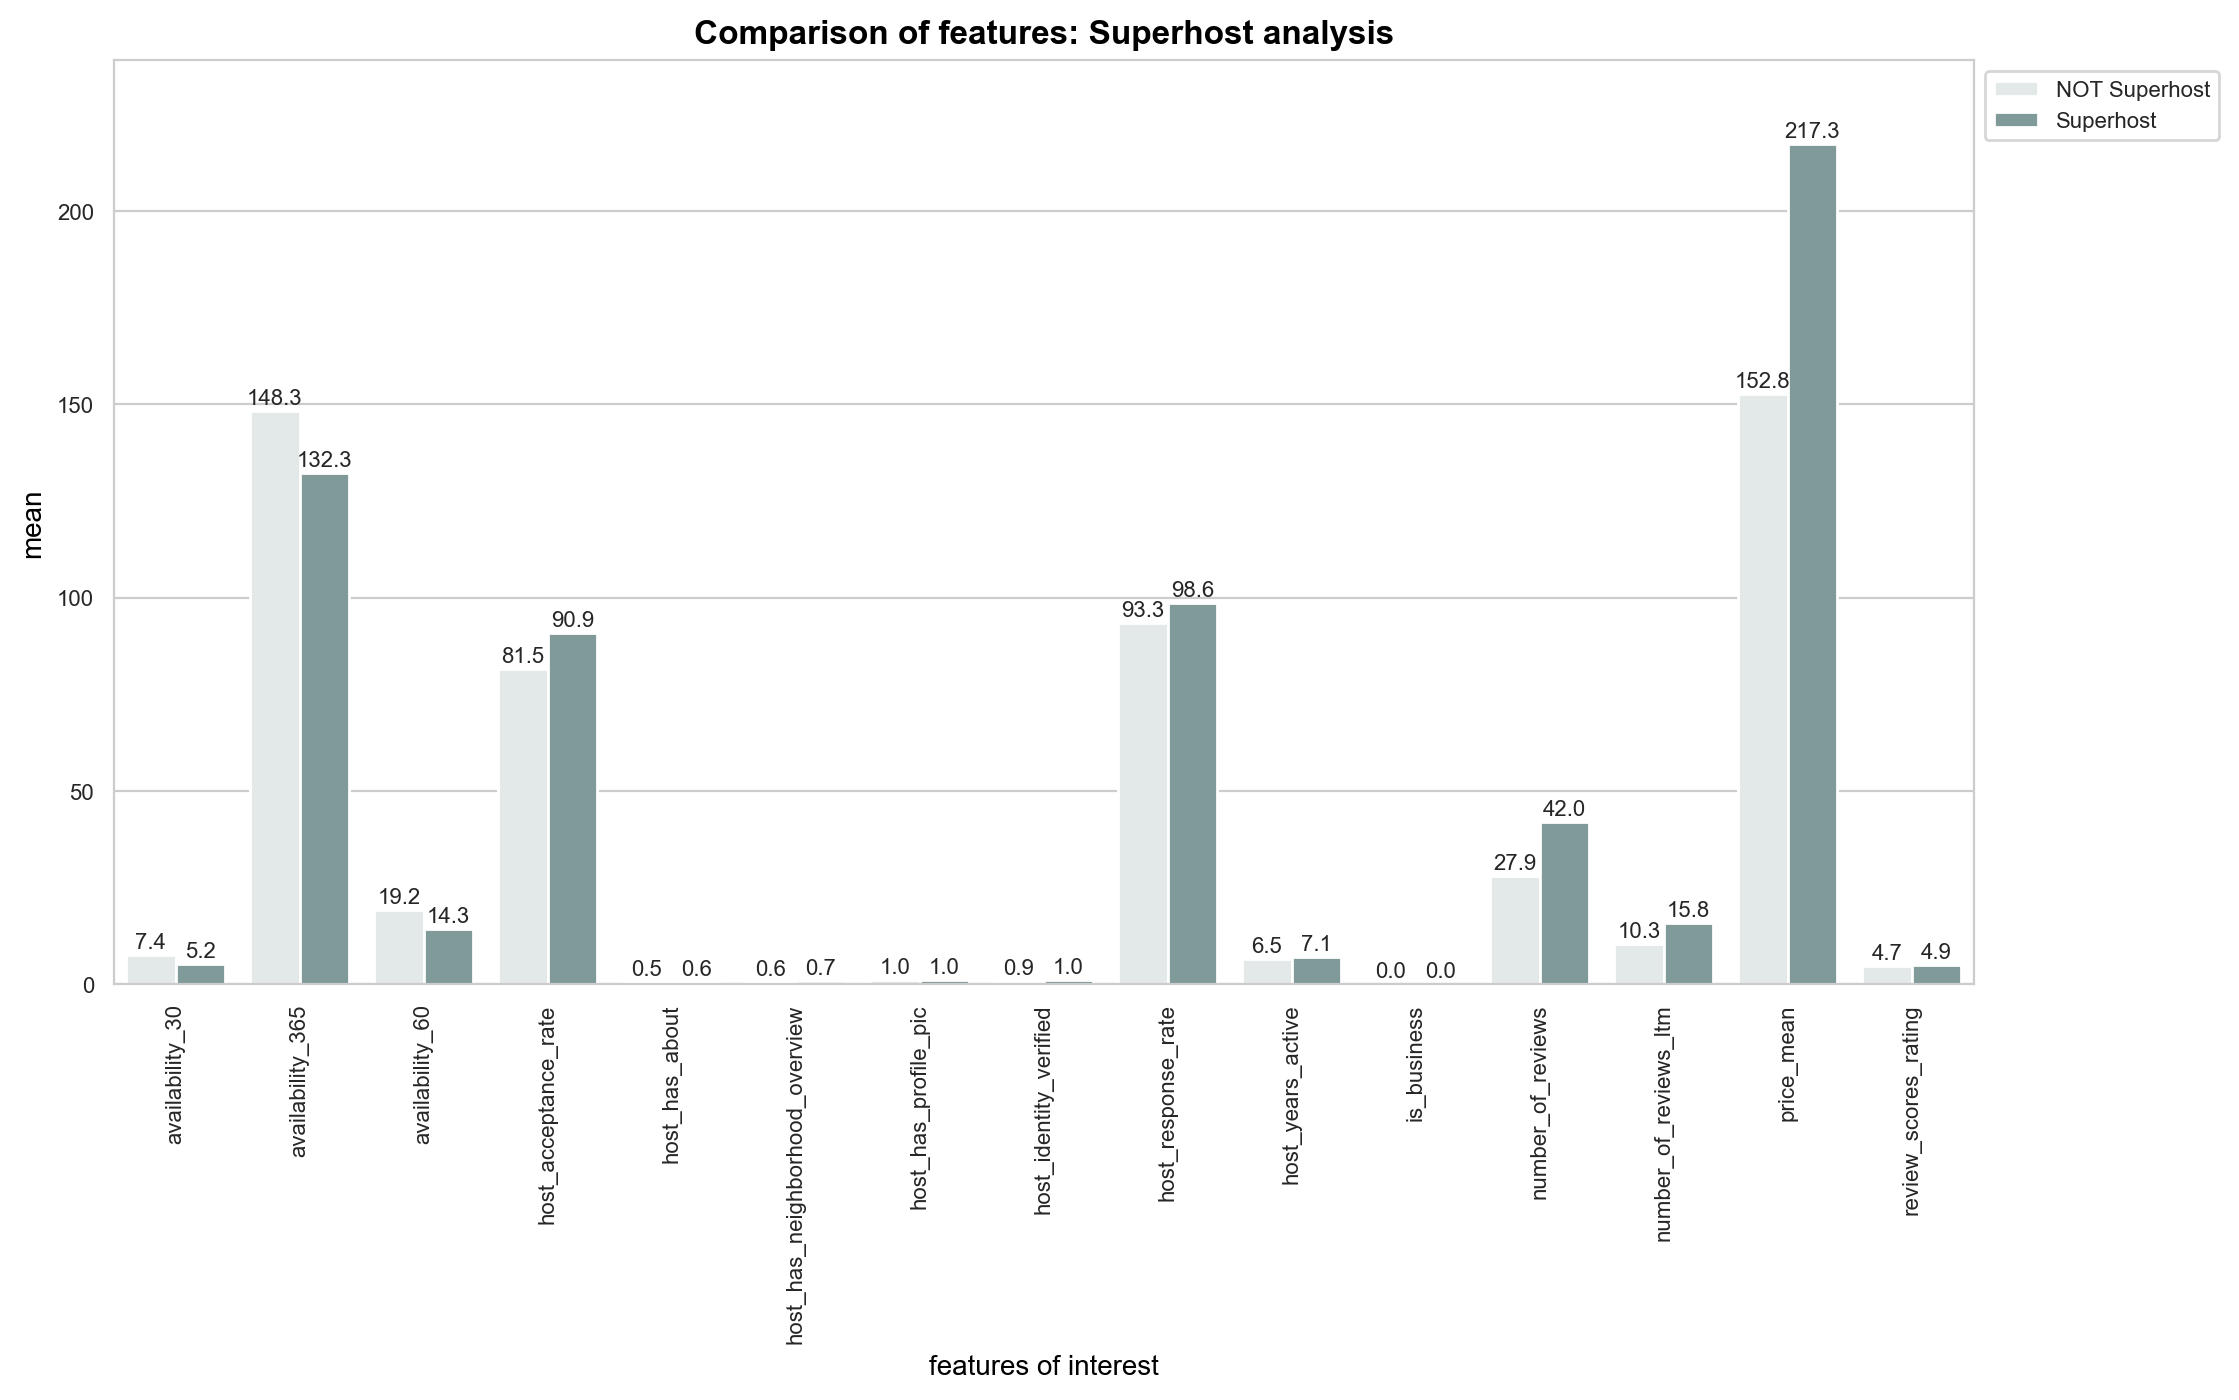

In [28]:
vs.compare_features(host_grouped,
                    host_features_reduced.copy(),
                    conda='host_is_superhost == False',
                    condb='host_is_superhost == True',
                    cata_description='NOT Superhost',
                    catb_description='Superhost',
                    title_extension='Superhost analysis',
                    feature_focus='host_is_superhost')

> **Observation:** 
> Superhosts:
> - charge on average more per night 
> - have more reviews
> - only a slightly higher rating score (4.9 vs 4.7 for others)
> - have a higher acceptance and response rate 
> - less availability as their properties must be more popular

#### Explore deeper the price differences between superhosts and others

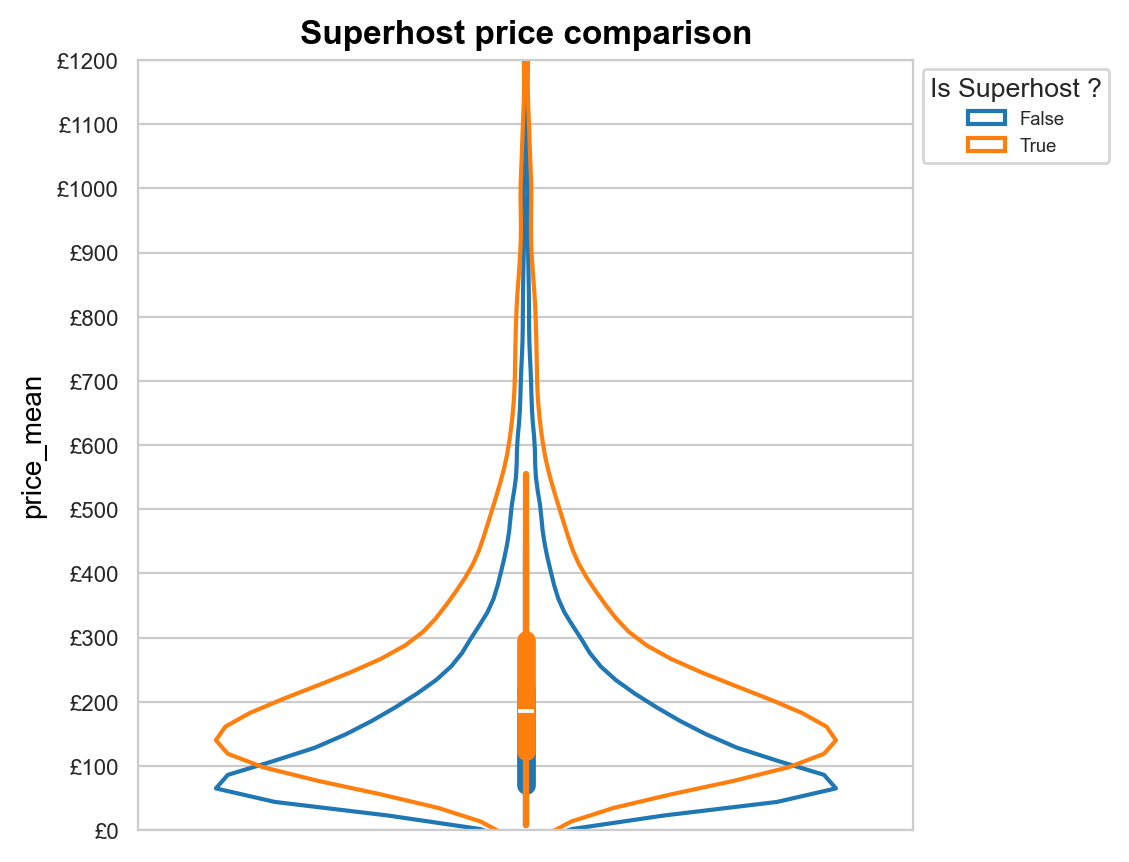

In [29]:
# Superhost price comparison
plt.figure(figsize=(5, 5))
sns.violinplot(data=host,
               y='price_mean',
               fill=False,
               hue='host_is_superhost',
               dodge=False,
               split=False)

yticks = np.arange(0, 1400, 100)
ylabels = ['£{:1.0f}'.format(tick) for tick in yticks]
plt.yticks(yticks, ylabels)
plt.ylim(0, 1200)

plt.title('Superhost price comparison')
plt.legend(bbox_to_anchor=(1, 1),
           loc='upper left',
           title='Is Superhost ?',
           fontsize='small',
           title_fontsize='large')
plt.show()

>**Observation:** Superhosts have higher price density for higher prices

#### Explore deeper the availability between superhosts and others

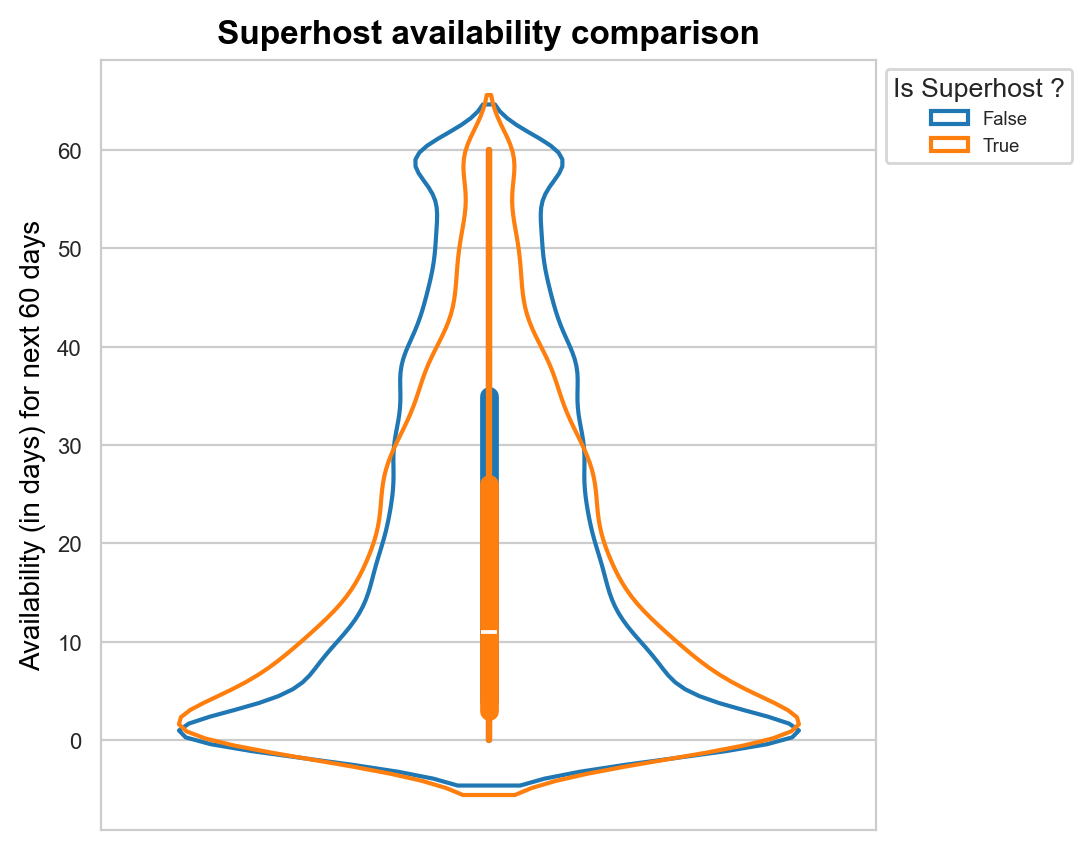

In [30]:
plt.figure(figsize=(5, 5))
sns.violinplot(data=host,
               y='availability_60',
               fill=False,
               hue='host_is_superhost',
               dodge=False,
               split=False)

plt.title('Superhost availability comparison')
plt.ylabel('Availability (in days) for next 60 days')
plt.legend(bbox_to_anchor=(1, 1),
           loc='upper left',
           title='Is Superhost ?',
           fontsize='small',
           title_fontsize='large')
plt.show()

>**Observation:** 
> - Superhosts have a denser availabilty up to 40 days.
> - Between 40-60 days, other hosts have higher density. 

> Overall Superhosts thus have lower availability

#### Compare prices of room types between superhosts and others

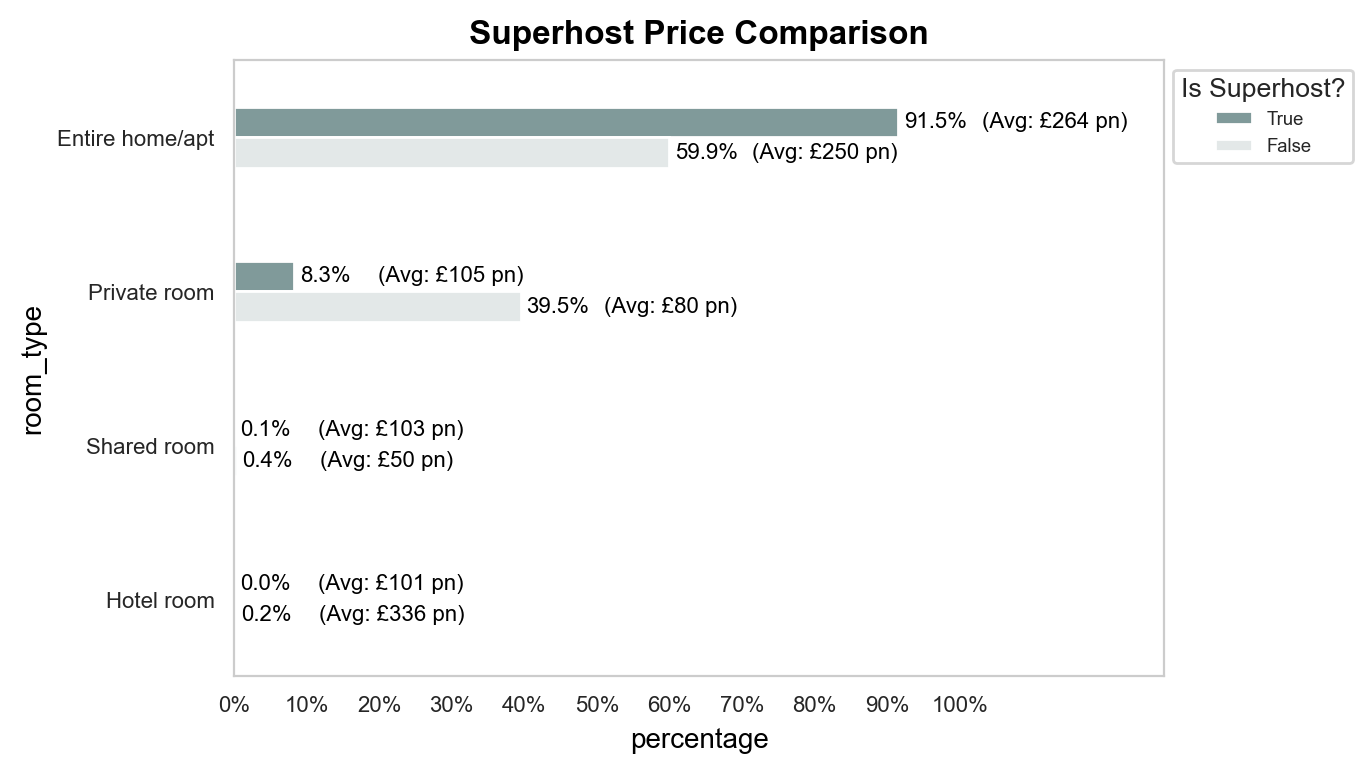

In [31]:
# compare room types using bar plot
df_superhost = host.query('host_is_superhost == True')
df_notsuperhost = host.query('host_is_superhost == False')

vs.annotate_grouped_barplot(df_superhost,
                            df_notsuperhost,
                            hue='host_is_superhost',
                            x='room_type',
                            y='percentage',
                            figsize=(6, 4),
                            title='Superhost Price Comparison',
                            legend_title='Is Superhost?',
                            show_gridlines=False)

> **Observation**
> - 92% of superhost rentals are for entire home/apartment, with remaining 8% renting private rooms. Superhost don't really rent out shared rooms or hotel rooms
> - NON superhosts, have a 40% of their business in private rooms (vs 8% in superhosts)

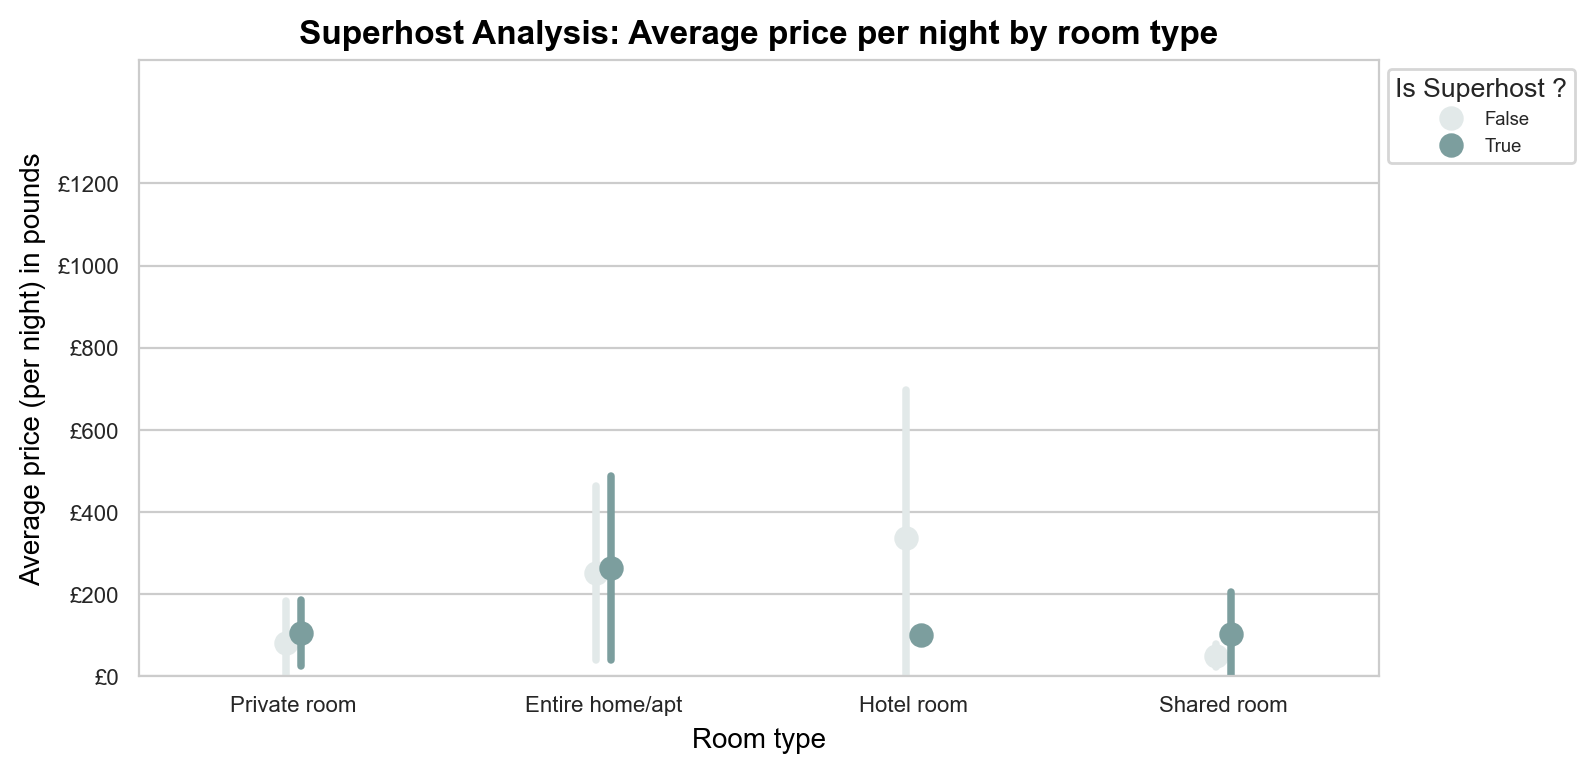

In [32]:
# compare room types using point plot to see price variations
plt.figure(figsize=(8, 4))
g = sns.pointplot(data=host,
                  x='room_type',
                  y='price_mean',
                  hue='host_is_superhost',
                  dodge=True,
                  palette={True: BASE_COLOR, False: BASE_GREY},
                  errorbar='sd',
                  linestyles="",
                  marker='o')

plt.title('Superhost Analysis: Average price per night by room type')
plt.ylabel('Average price (per night) in pounds')
plt.xlabel('Room type')
plt.legend(bbox_to_anchor=(1, 1),
           loc='upper left',
           title='Is Superhost ?',
           fontsize='small',
           title_fontsize='large')

plt.ylim(0, 1500)
yticks = np.arange(0, 1400, 200)
ylabels = ['£{:1.0f}'.format(tick) for tick in yticks]
plt.yticks(yticks, ylabels)

plt.show()

> **Observation**
> - Prices for different room types are only very slightly higher for superhosts, with hotel rooms being an exception where superhosts don't have many listings

#### Compare prices of property types belonging to room types 'Entire home/apt' and 'Private room' only

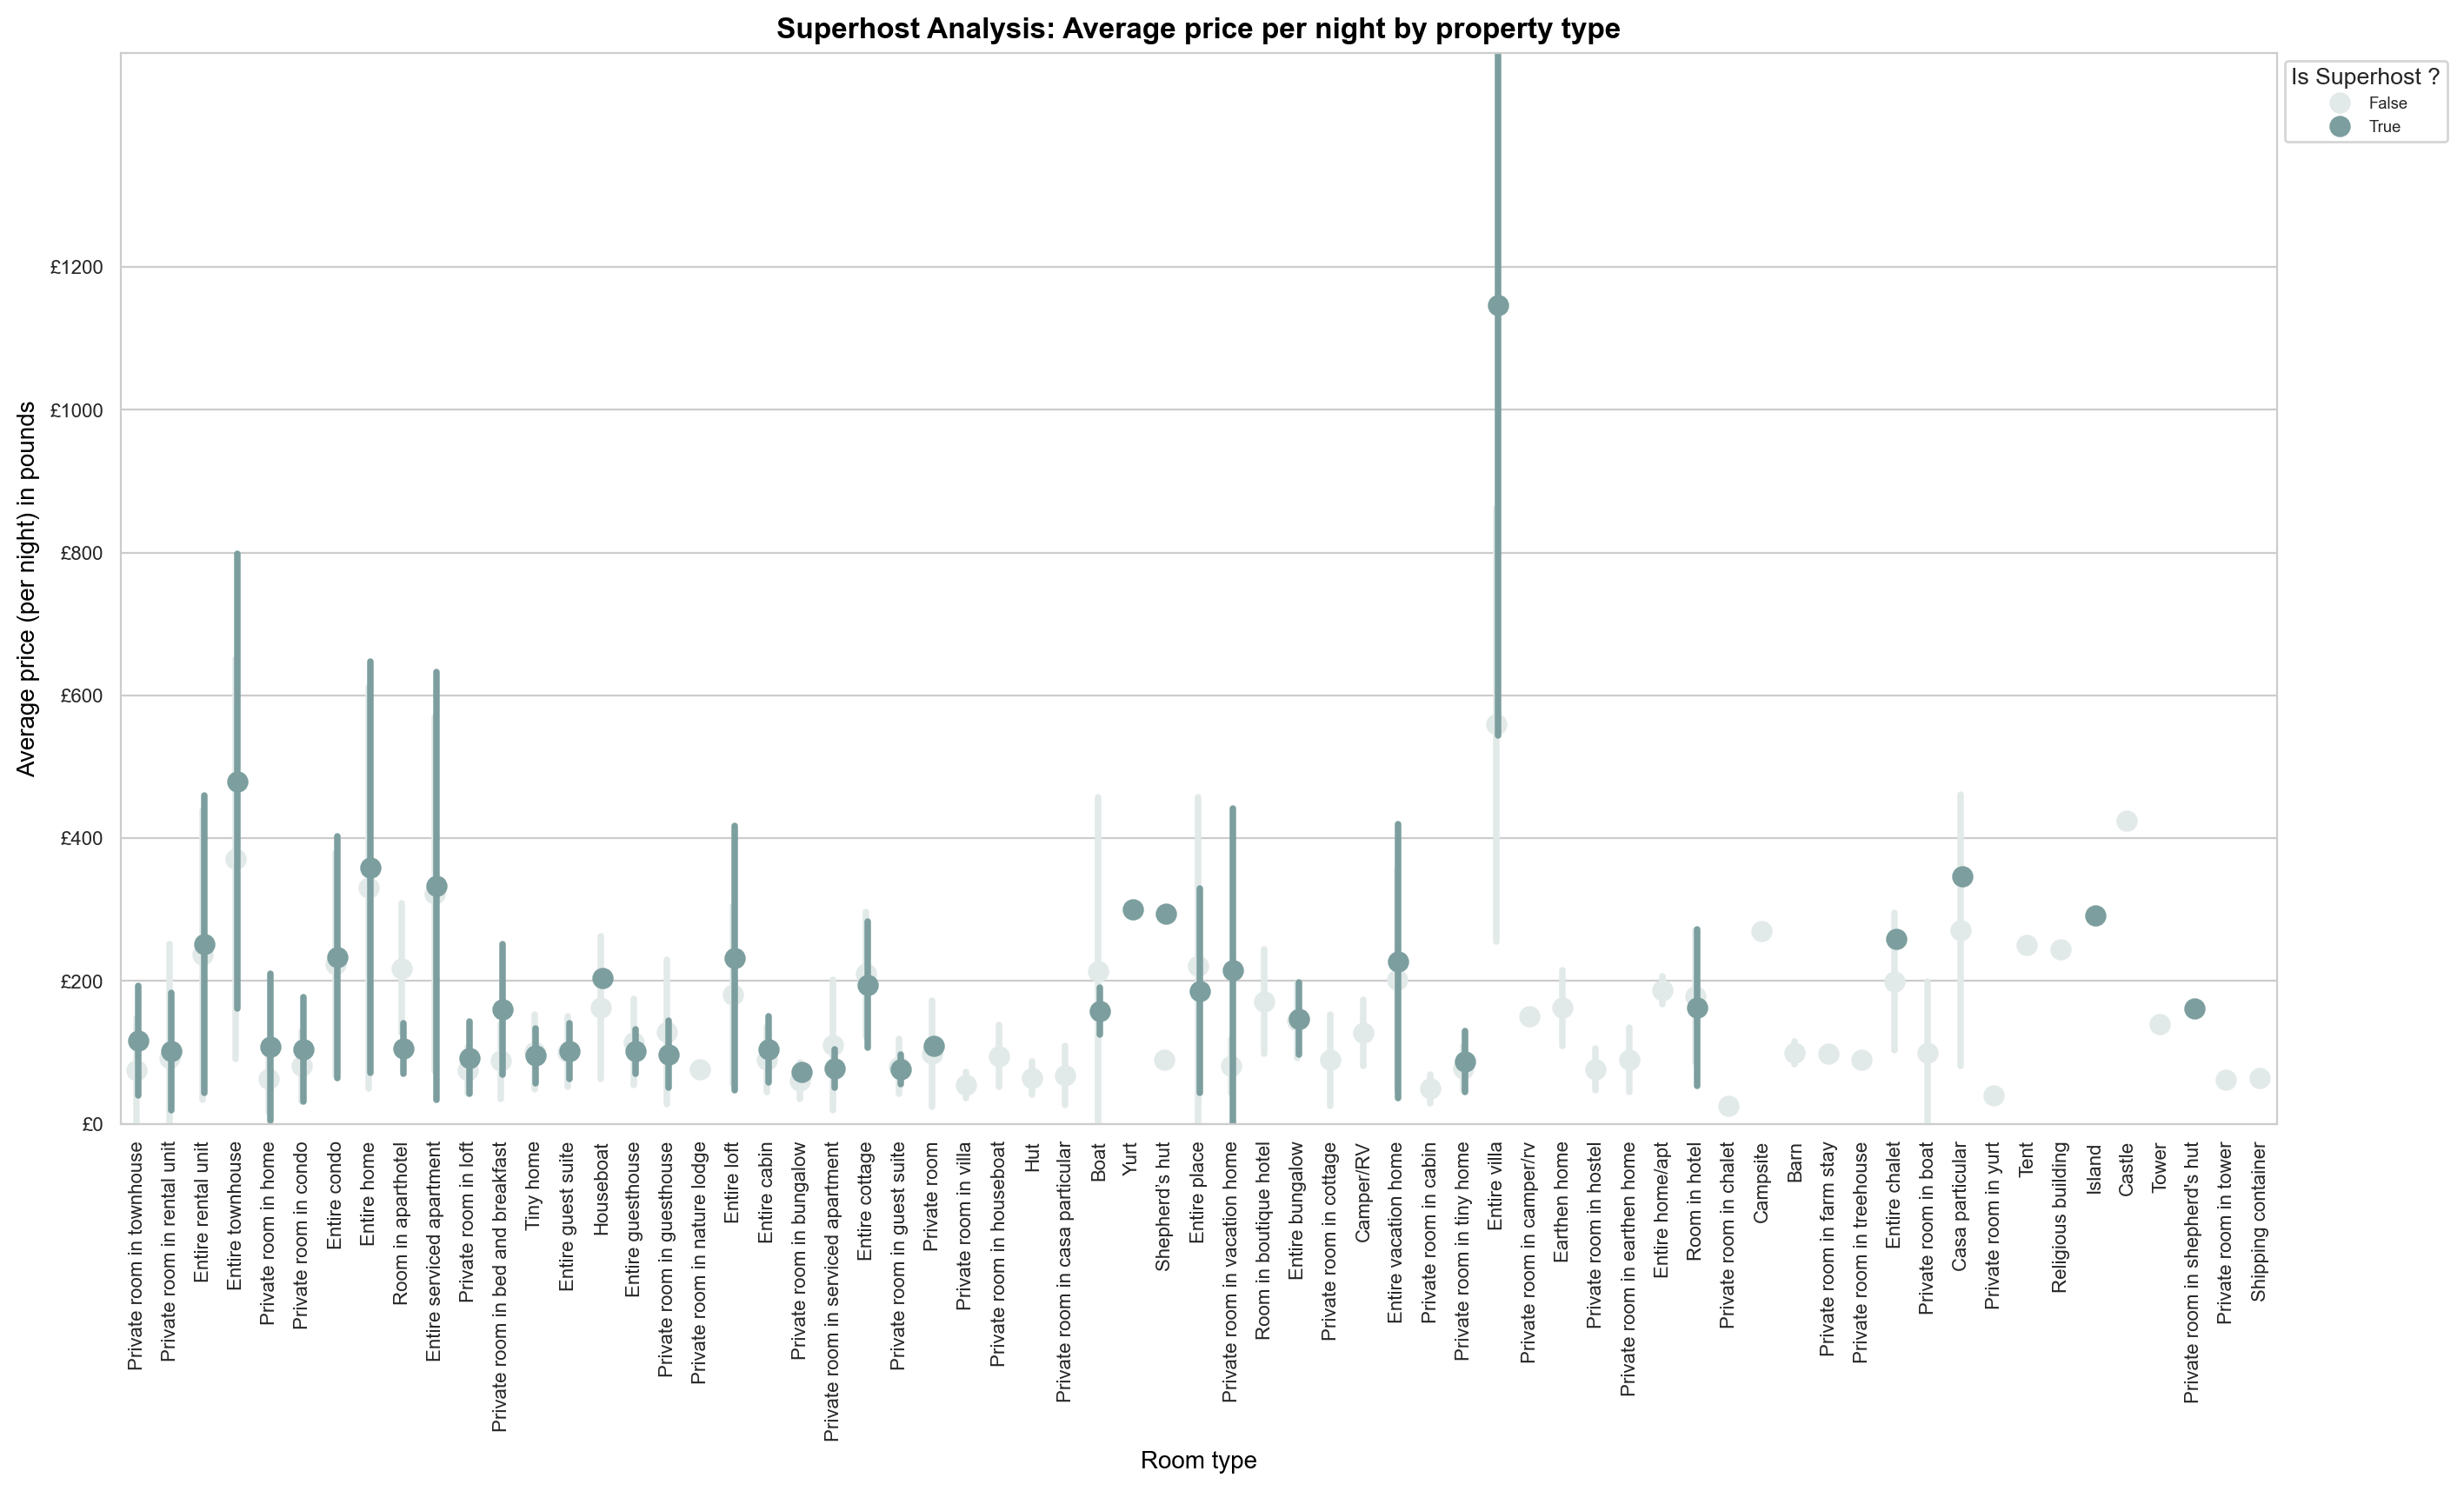

In [33]:
# compare property types using pointplot

mylist = ['Entire home/apt', 'Private room']
host_filtered = host[host['room_type'].isin(mylist)]

plt.figure(figsize=(16, 8))
sns.pointplot(data=host_filtered,
              x='property_type',
              y='price_mean',
              hue='host_is_superhost',
              dodge=True,
              palette={True: BASE_COLOR, False: BASE_GREY},
              errorbar='sd',
              linestyles="",
              marker='o')

plt.title(
    'Superhost Analysis: Average price per night by property type')
plt.ylabel('Average price (per night) in pounds')
plt.xlabel('Room type')
plt.legend(bbox_to_anchor=(1, 1),
           loc='upper left',
           title='Is Superhost ?',
           fontsize='small',
           title_fontsize='large')

plt.xticks(rotation=90)
plt.ylim(0, 1500)
yticks = np.arange(0, 1400, 200)
ylabels = ['£{:1.0f}'.format(tick) for tick in yticks]
plt.yticks(yticks, ylabels)

plt.show()

> **Observation**
> - On the left of the plot, superhosts have higher rental prices for mostly entire homes or private rooms. On the right of the plot, super hosts are absent, only individual hosts are at play. 

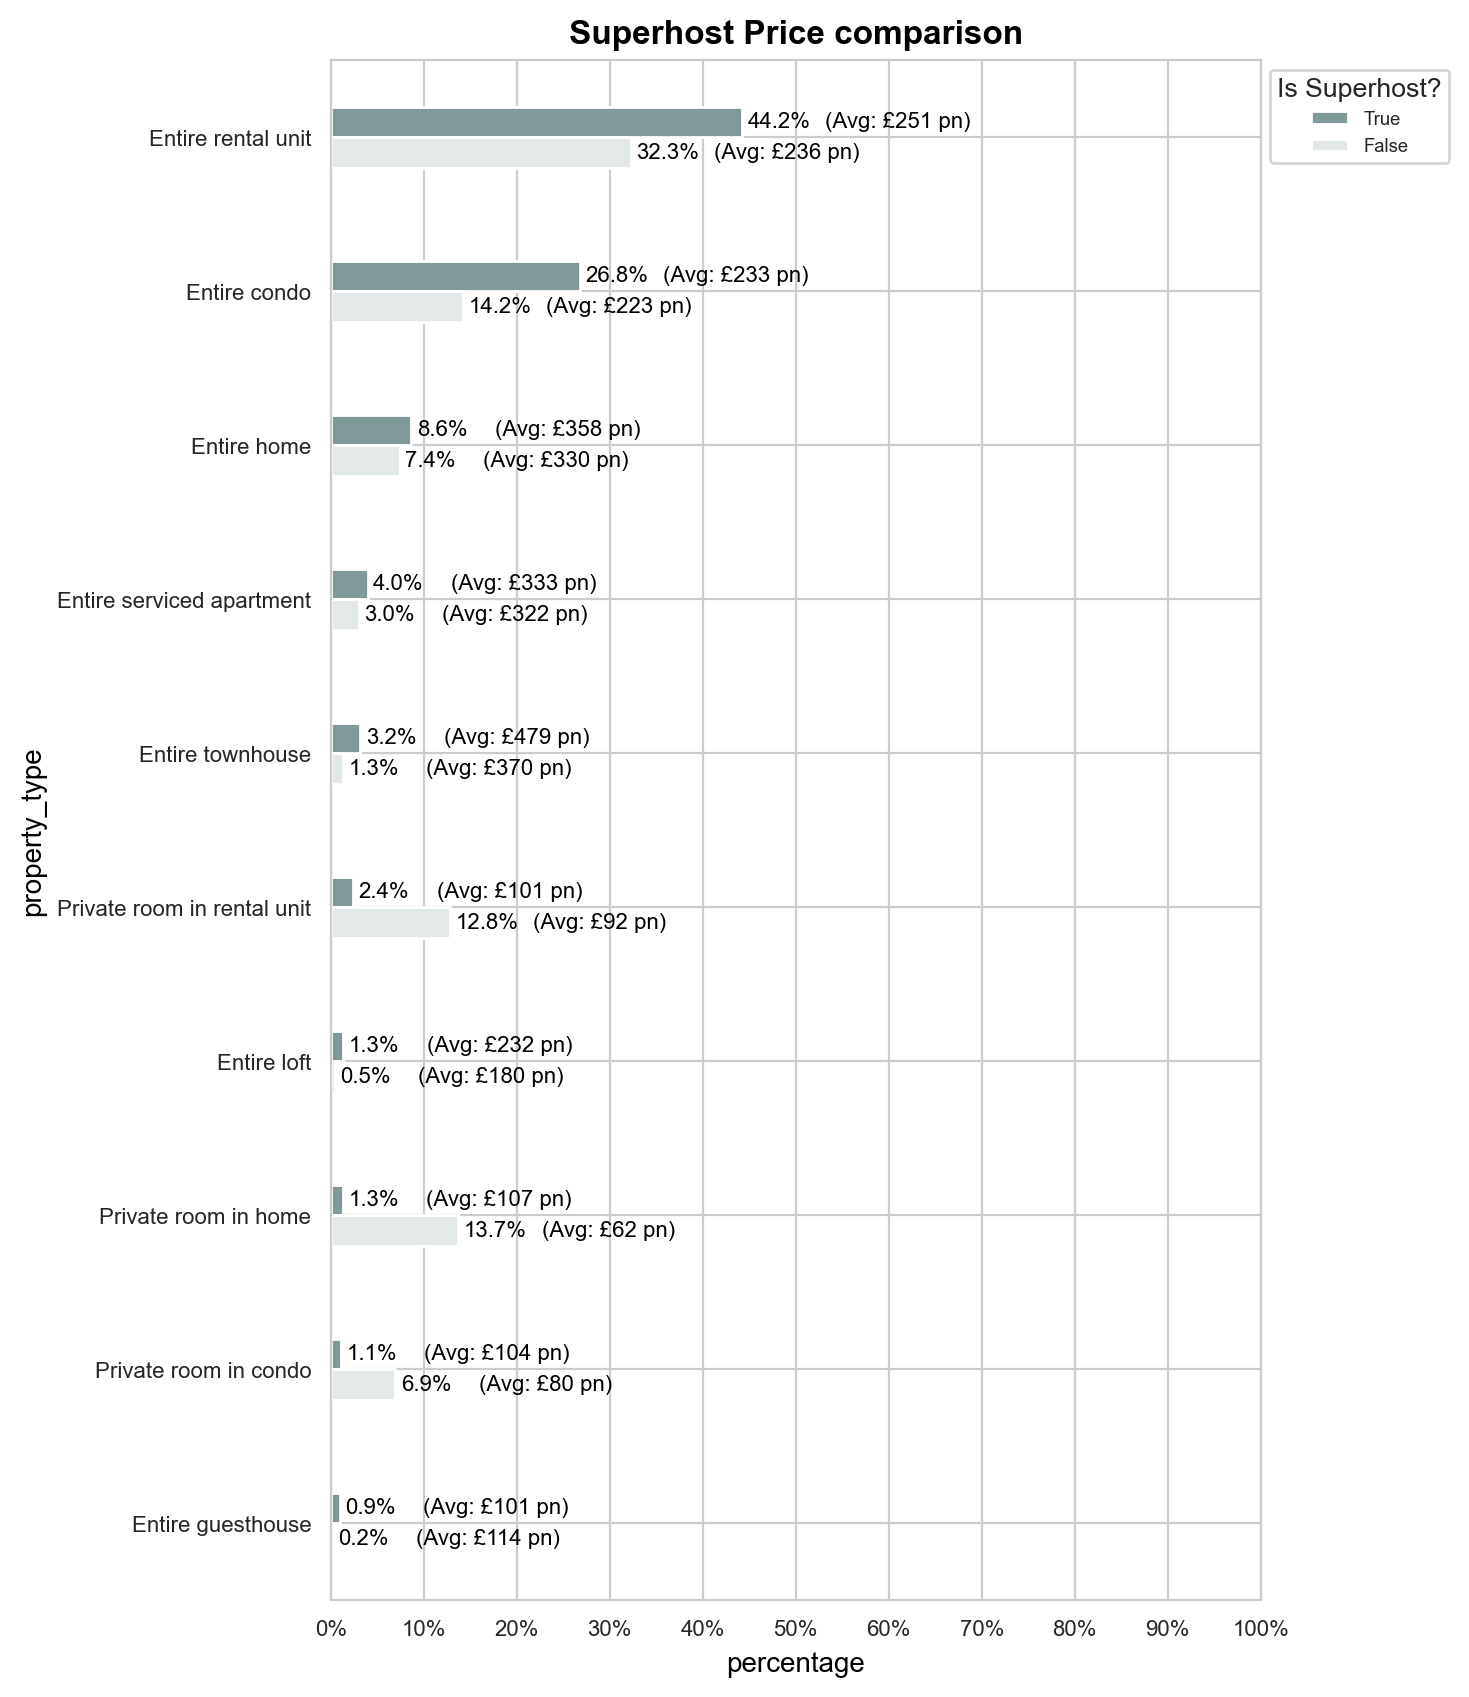

In [34]:
# compare property types using barplot
vs.annotate_grouped_barplot(df_superhost,
                            df_notsuperhost,
                            hue='host_is_superhost',
                            x='property_type',
                            y='percentage',
                            title='Superhost Price comparison',
                            legend_title='Is Superhost?')

> **Observation**
> - Again we can see superhosts charge slightly more on average for most property types

#### Compare prices in neighbourhoods between superhosts and others

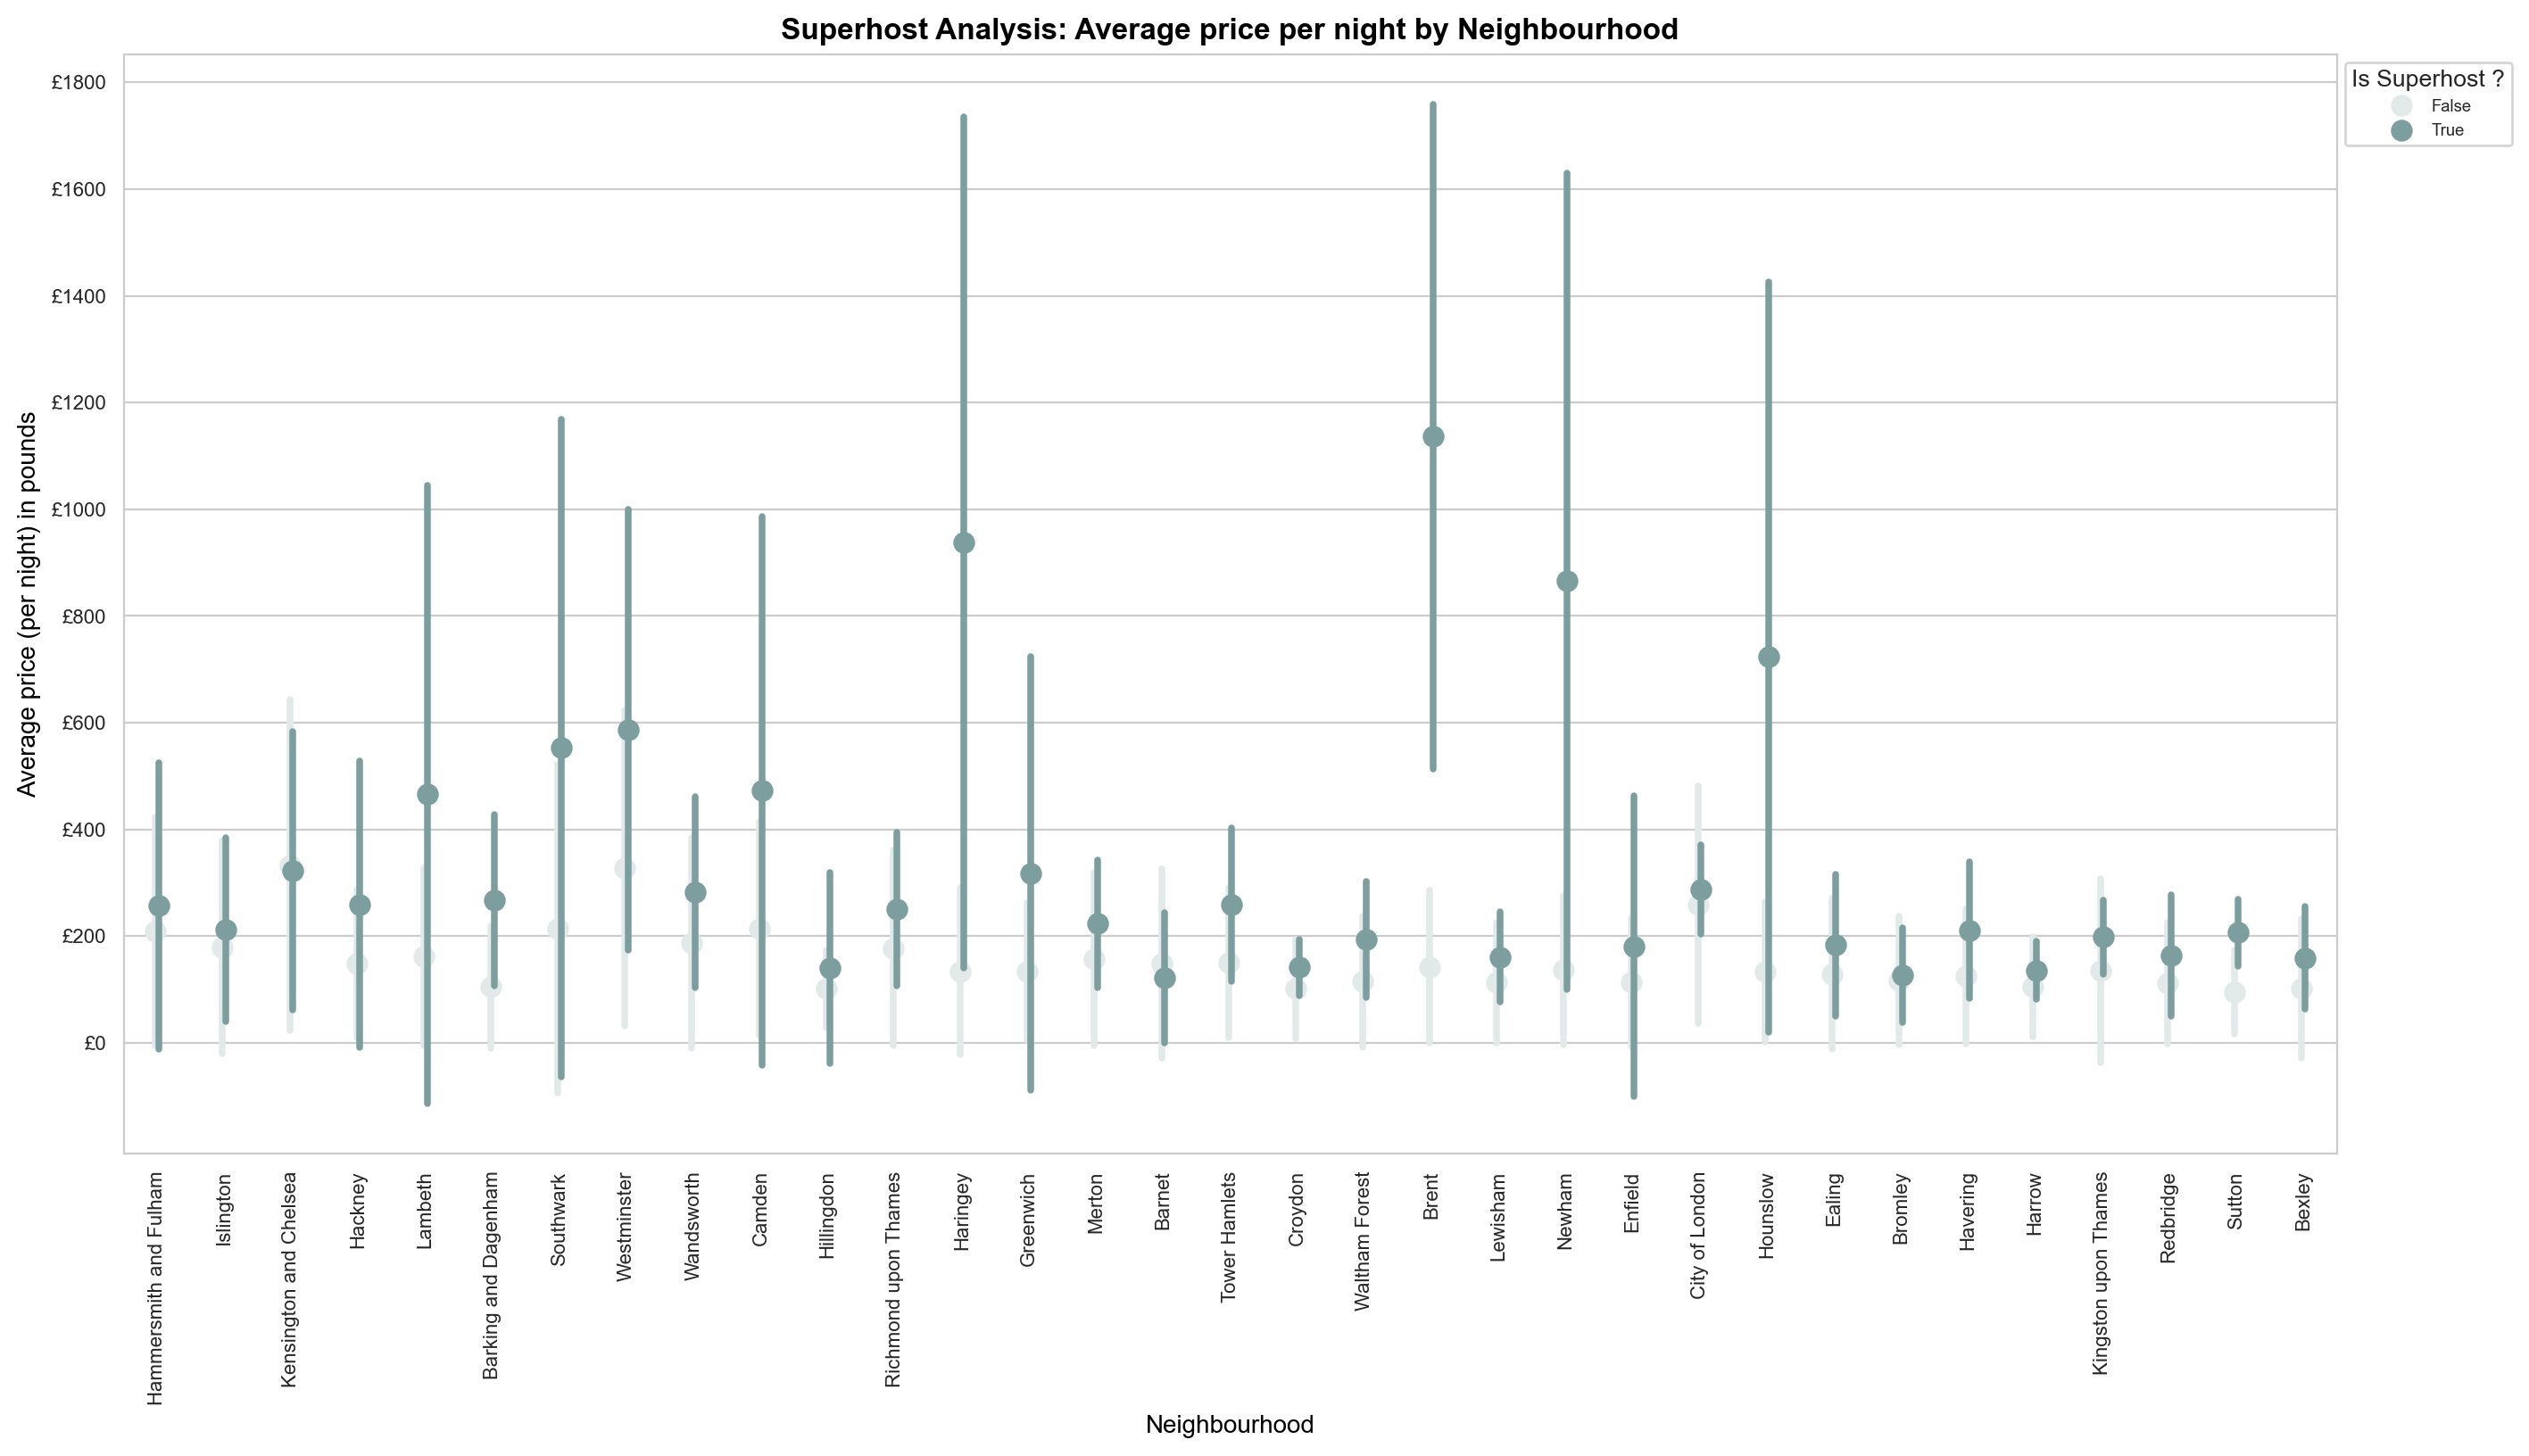

In [35]:
# neighbourhood analysis
plt.figure(figsize=(16, 8))
sns.pointplot(data=listings,
              x='neighbourhood_cleansed',
              y='price_mean',
              hue='is_business',
              dodge=True,
              palette={True: BASE_COLOR, False: BASE_GREY},
              errorbar='sd',
              linestyles="", marker='o')

plt.title('Superhost Analysis: Average price per night by Neighbourhood')
plt.ylabel('Average price (per night) in pounds')
plt.xlabel('Neighbourhood')
plt.legend(bbox_to_anchor=(1, 1),
           loc='upper left',
           title='Is Superhost ?',
           fontsize='small',
           title_fontsize='large')

plt.xticks(rotation=90)
yticks = np.arange(0, 2000, 200)
ylabels = ['£{:1.0f}'.format(tick) for tick in yticks]
plt.yticks(yticks, ylabels)

plt.show()

>**Observation:** 
> - Super hosts have slightly higher prices on average is all neighbourhoods

## Host Conclusion:

Superhosts consistently charge slightly more even we analyse the data from different perspectives of room type, property type and neighbourhoods.

Even though superhosts charge slightly more, they have less availability and higher ratings, thus are still more popular despite the price.

The findings confirm the explanation I found on airbnb that describes superhosts

<img src="../images/superhosts.png" alt="drawing" width="300" align="left"/>

<a id='star'></a>
<span style="color:blue; font-size:30px; line-height:40px; font-family: Calibri;">What effect does **star ratings** have on rental price ?</span>

In [36]:
star_features = ['host_is_superhost', 'is_business',
                 'price_mean', 'review_scores_rating',
                 'review_scores_accuracy', 'review_scores_cleanliness',
                 'review_scores_checkin',
                 'review_scores_communication', 'review_scores_location',
                 'review_scores_value', 'availability_90',
                 'room_type', 'neighbourhood_cleansed',
                 'property_type', 'accommodates']

#### Feature engineering

In [37]:
# select only features of interest
stars = listings[star_features].copy()

In [38]:
# for the star ratings analysis, filter data to
# only include records where we actually received an review
stars = stars[stars['review_scores_rating'] > 0]
stars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47738 entries, 0 to 69077
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            47738 non-null  bool   
 1   is_business                  47738 non-null  bool   
 2   price_mean                   47738 non-null  int64  
 3   review_scores_rating         47738 non-null  float64
 4   review_scores_accuracy       47721 non-null  float64
 5   review_scores_cleanliness    47730 non-null  float64
 6   review_scores_checkin        47718 non-null  float64
 7   review_scores_communication  47723 non-null  float64
 8   review_scores_location       47717 non-null  float64
 9   review_scores_value          47716 non-null  float64
 10  availability_90              47738 non-null  int64  
 11  room_type                    47738 non-null  object 
 12  neighbourhood_cleansed       47738 non-null  object 
 13  property_type        

In [39]:
# drop missing values
stars.dropna(inplace=True)
stars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47711 entries, 0 to 69077
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            47711 non-null  bool   
 1   is_business                  47711 non-null  bool   
 2   price_mean                   47711 non-null  int64  
 3   review_scores_rating         47711 non-null  float64
 4   review_scores_accuracy       47711 non-null  float64
 5   review_scores_cleanliness    47711 non-null  float64
 6   review_scores_checkin        47711 non-null  float64
 7   review_scores_communication  47711 non-null  float64
 8   review_scores_location       47711 non-null  float64
 9   review_scores_value          47711 non-null  float64
 10  availability_90              47711 non-null  int64  
 11  room_type                    47711 non-null  object 
 12  neighbourhood_cleansed       47711 non-null  object 
 13  property_type        

In [40]:
stars.describe(percentiles, include='all')

host_is_superhost is_business    price_mean  review_scores_rating  \
count              47711       47711  47711.000000          47711.000000   
unique                 2           2           NaN                   NaN   
top                False       False           NaN                   NaN   
freq               41821       45547           NaN                   NaN   
mean                 NaN         NaN    192.086793              4.619955   
std                  NaN         NaN    206.324546              0.554901   
min                  NaN         NaN      8.000000              1.000000   
2.5%                 NaN         NaN     32.000000              3.000000   
25%                  NaN         NaN     75.000000              4.500000   
50%                  NaN         NaN    131.000000              4.800000   
75%                  NaN         NaN    229.000000              5.000000   
85%                  NaN         NaN    308.000000              5.000000   
90%                  NaN         NaN    387.000000              5.000000   
95%                  NaN         NaN    545.000000              5.000000   
97.5%                NaN         NaN    759.750000              5.000000   
99%                  NaN         NaN   1122.900000              5.000000   
99.9%                NaN         NaN   1750.000000              5.000000   
max                  NaN         NaN   2000.000000              5.000000   

        review_scores_accuracy  review_scores_cleanliness  \
count             47711.000000               47711.000000   
unique                     NaN                        NaN   
top                        NaN                        NaN   
freq                       NaN                        NaN   
mean                  4.677961                   4.597333   
std                   0.534120                   0.580789   
min                   0.000000                   0.000000   
2.5%                  3.000000                   3.000000   
25%                   4.600000                   4.500000   
50%                   4.860000                   4.780000   
75%                   5.000000                   5.000000   
85%                   5.000000                   5.000000   
90%                   5.000000                   5.000000   
95%                   5.000000                   5.000000   
97.5%                 5.000000                   5.000000   
99%                   5.000000                   5.000000   
99.9%                 5.000000                   5.000000   
max                   5.000000                   5.000000   

        review_scores_checkin  review_scores_communication  \
count            47711.000000                 47711.000000   
unique                    NaN                          NaN   
top                       NaN                          NaN   
freq                      NaN                          NaN   
mean                 4.752961                     4.767580   
std                  0.485841                     0.492487   
min                  0.000000                     0.000000   
2.5%                 3.500000                     3.430000   
25%                  4.720000                     4.750000   
50%                  4.920000                     4.940000   
75%                  5.000000                     5.000000   
85%                  5.000000                     5.000000   
90%                  5.000000                     5.000000   
95%                  5.000000                     5.000000   
97.5%                5.000000                     5.000000   
99%                  5.000000                     5.000000   
99.9%                5.000000                     5.000000   
max                  5.000000                     5.000000   

        review_scores_location  review_scores_value  availability_90  \
count             47711.000000         47711.000000     47711.000000   
unique                     NaN                  NaN              NaN   
top    

>**Observation:** Overall, the average ratings are high between 4-5 stars, Airbnb is doing a great job !

#### Compare star ratings between superhosts vs others, businesses vs individuals

In [41]:
#  Summarize star ratings
bin_edges = np.arange(0, 5.5, 0.5)
bin_labels = bin_edges[1:]
stars['review_scores_rating_ranges'] = pd.cut(
    stars['review_scores_rating'],
    bins=bin_edges,
    include_lowest=True,
    labels=bin_labels).astype(float)

In [42]:
stars['review_scores_rating_ranges'].value_counts()

review_scores_rating_ranges
5.0    34844
4.5     7019
4.0     3740
3.0      822
3.5      628
1.0      325
2.0      215
2.5      107
1.5       11
Name: count, dtype: int64

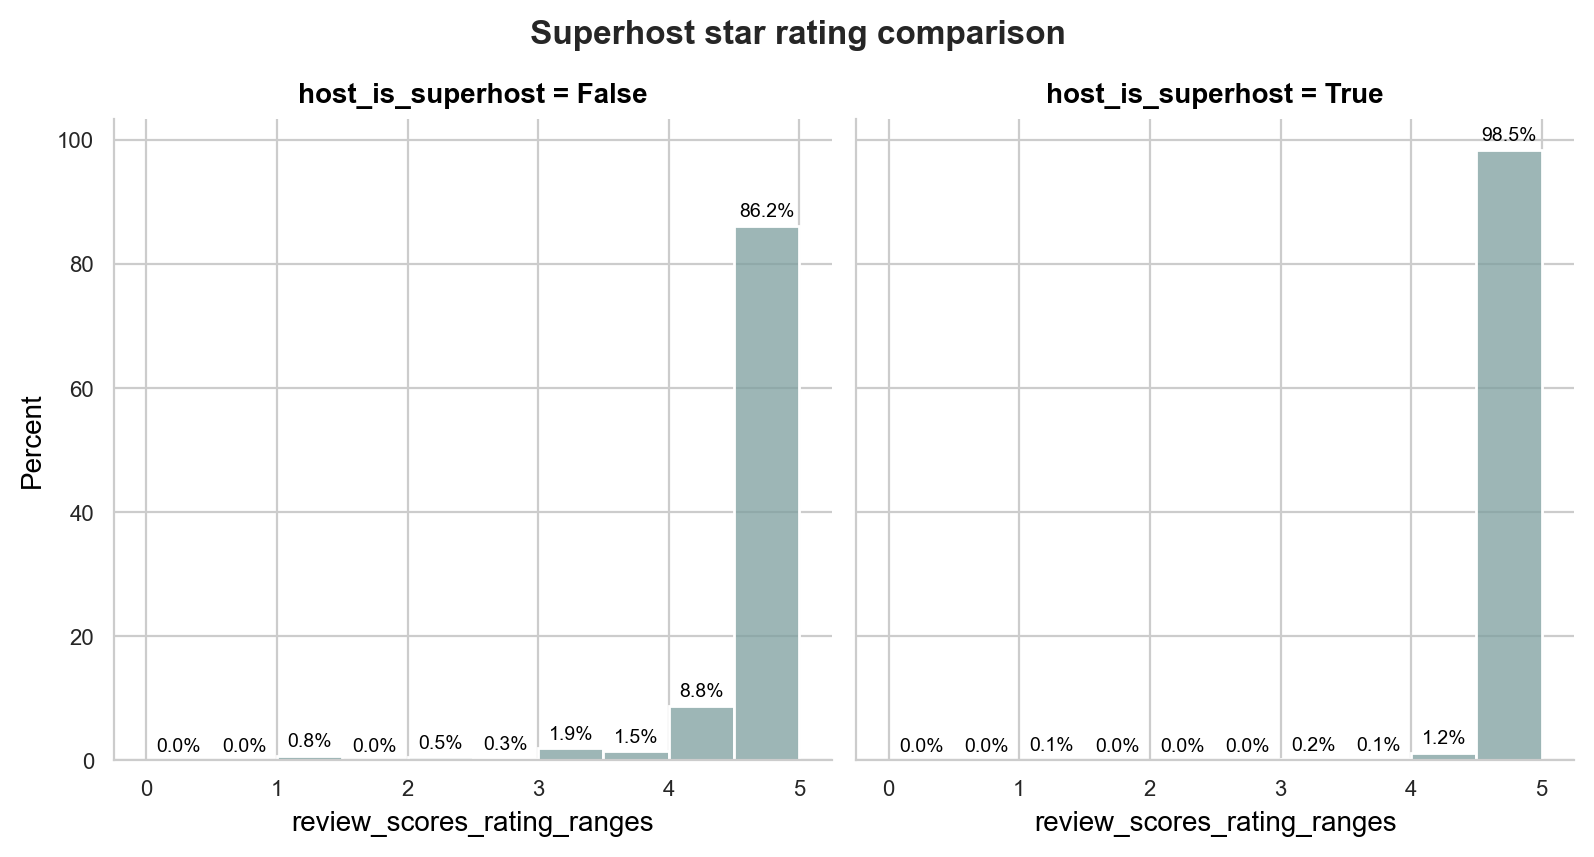

In [43]:
xbins = np.arange(0, 5.5, 0.5)
g = sns.FacetGrid(data=stars,
                  col='host_is_superhost',
                  margin_titles=True,
                  height=4)

g.map(sns.histplot,
      'review_scores_rating_ranges',
      bins=xbins,
      stat='percent',
      color=BASE_COLOR)

g.map(vs.annotate_bars, fmt='0.1f', fontsize=7, color='k')

# plt.xticks(xbins, xbins)
plt.suptitle('Superhost star rating comparison', y=1.05)
plt.show()

>**Observation:** Super hosts have 5-stars 98.5% of the time, whilst other hosts have 5-stars 86.2% of the time

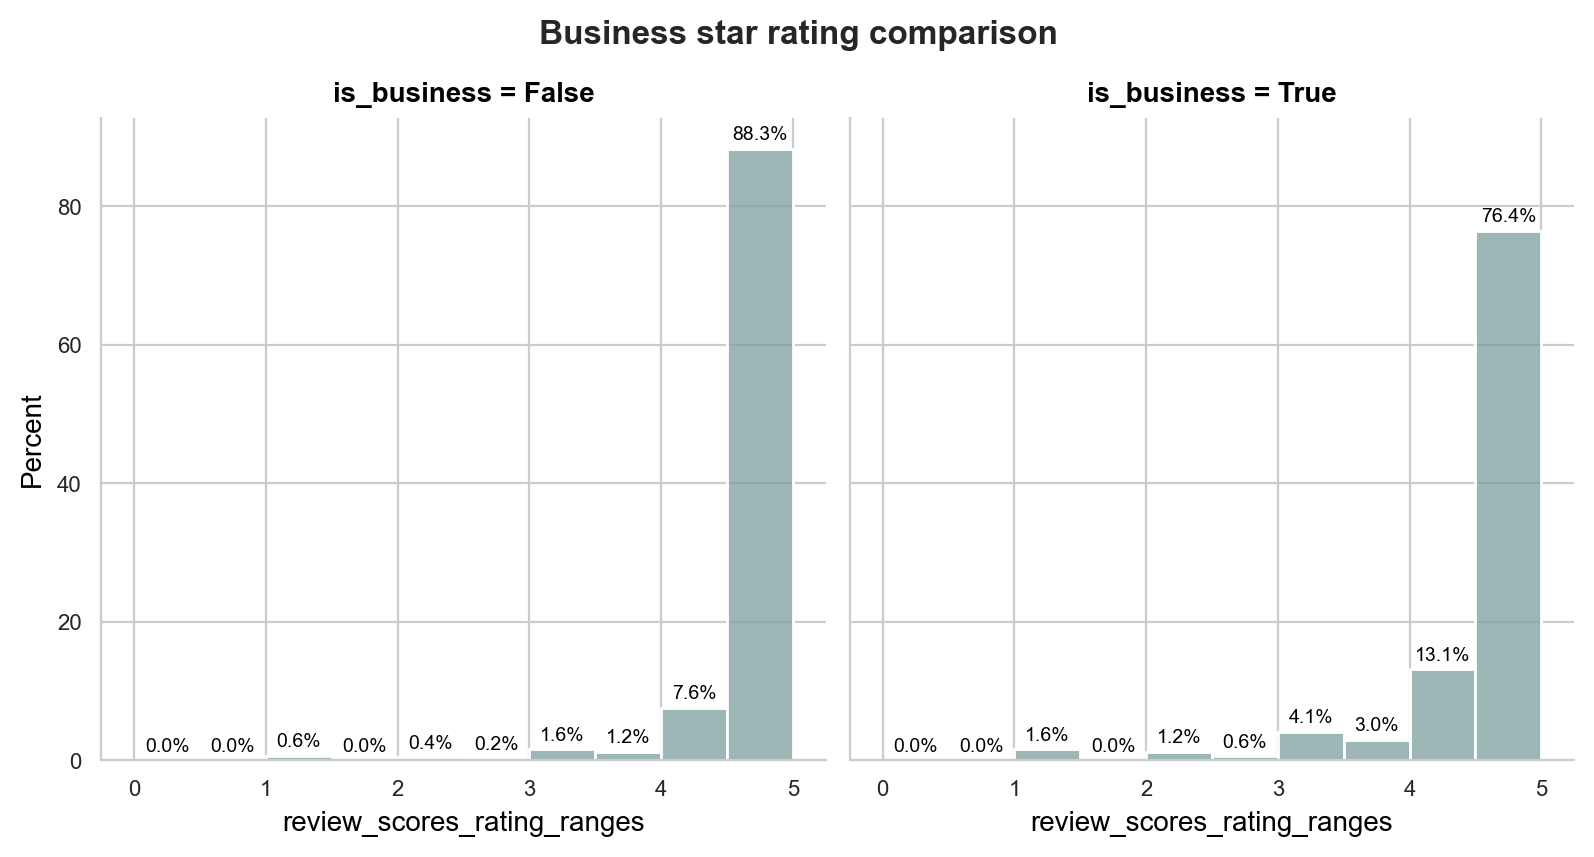

In [44]:
xbins = np.arange(0, 5.5, 0.5)

g = sns.FacetGrid(data=stars,
                  col='is_business',
                  margin_titles=True,
                  height=4)

g.map(sns.histplot,
      'review_scores_rating_ranges',
      bins=xbins,
      stat='percent',
      color=BASE_COLOR)

g.map(vs.annotate_bars, fmt='0.1f', fontsize=7, color='k')

plt.suptitle('Business star rating comparison', y=1.05)
plt.show()

**Observation:** 
>- Individuals renting entire homes rates location higher than those renting private rooms
>- Individuals renting private homes rates value higher

#### What is the relationship between price and star ratings ?

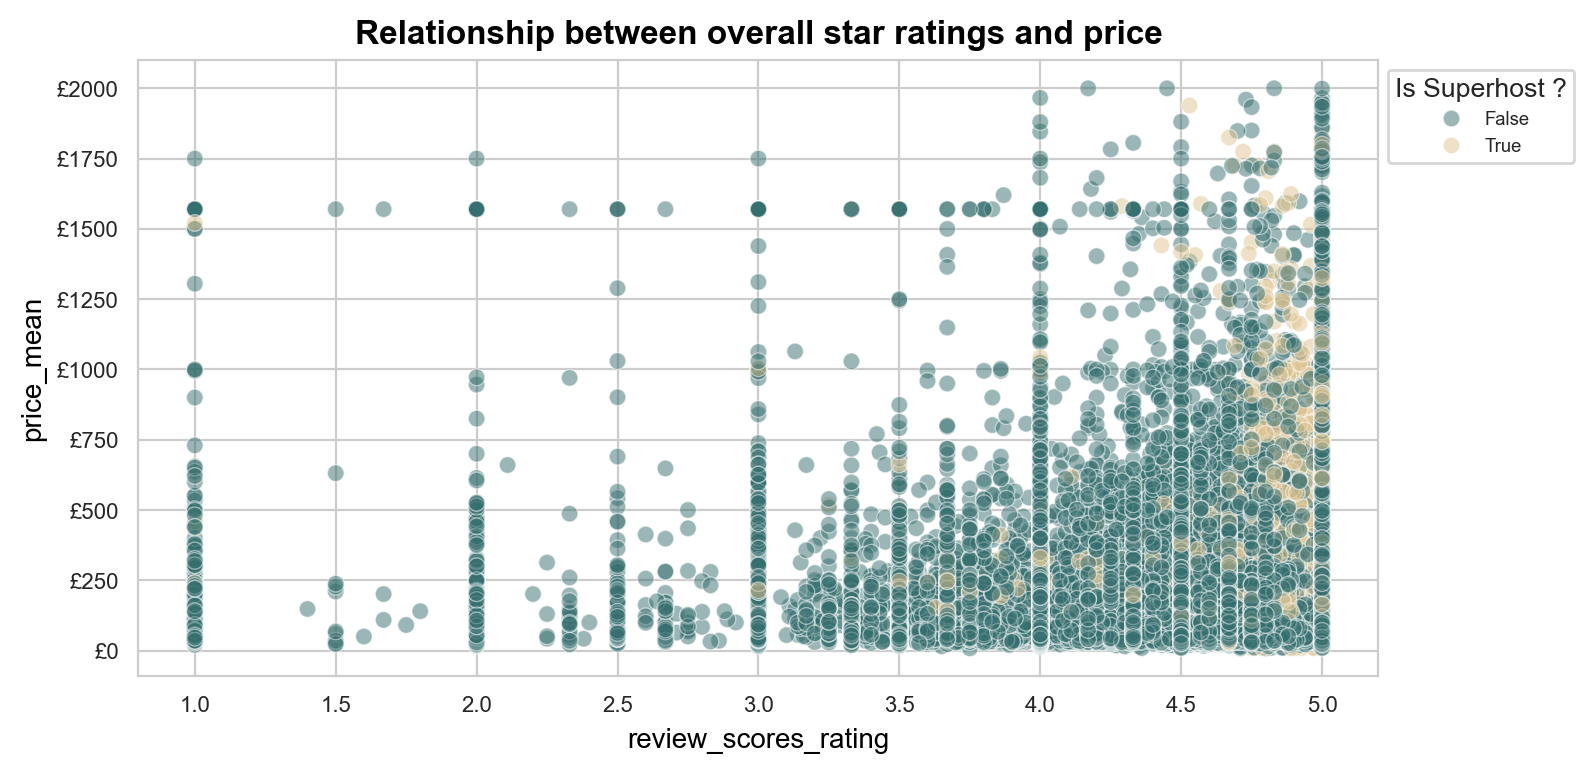

In [45]:
# Observe relationship between overall star ratings and price,
# for business vs individuals
sns.scatterplot(data=stars,
                x='review_scores_rating',
                y='price_mean',
                hue='host_is_superhost',
                alpha=0.5,
                palette=[BASE_HIGHLIGHT_INTENSE, BASE_COMPLIMENTARY])

yticks = np.arange(0, 2200, 250)
ylabels = ['£{:1.0f}'.format(tick) for tick in yticks]
plt.yticks(yticks, ylabels)

plt.title('Relationship between overall star ratings and price')
plt.legend(bbox_to_anchor=(1, 1),
           loc='upper left',
           title='Is Superhost ?',
           fontsize='small',
           title_fontsize='large')

plt.show()

>**Observation:** 
> - Superhosts have higher ratings closer to 5. 
> - A upwards trend can be observed. Higher priced properties tends to have higher ratings.

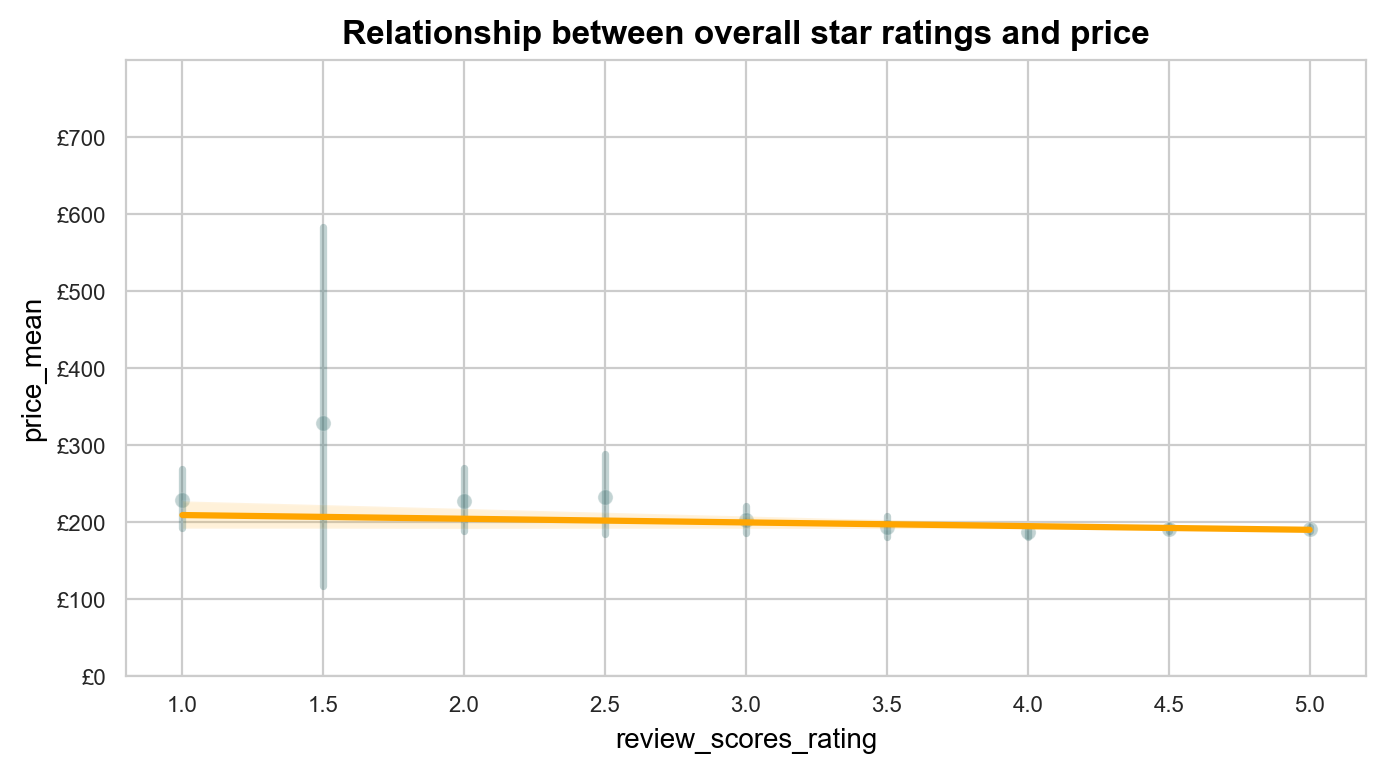

In [46]:
# fit regression line between ratings and price

ticks = np.arange(0, 5.5, 0.5)

sns.regplot(data=stars,
            x='review_scores_rating',
            y='price_mean',
            fit_reg=True,
            truncate=True,
            color=BASE_HIGHLIGHT_INTENSE,
            x_jitter=True,
            x_bins=ticks,
            scatter_kws={'alpha': 0.3,
                         's': 30,
                         'edgecolor': 'white',
                         'linewidths': 0.5},
            line_kws={'color': 'orange'})

yticks = np.arange(0, 800, 100)
ylabels = ['£{:1.0f}'.format(tick) for tick in yticks]
plt.yticks(yticks, ylabels)
plt.ylim(0, 800)

plt.title('Relationship between overall star ratings and price')

plt.show()

>**Observation:** There is an unexpected very slight downwards trend, the price goes down when the star rating increase ? It's the opposite that can be observed in the scatter plot. Can it be that businesses cause irritic mean prices and this is the cause ?

#### What is the relations between stars and price for business vs individuals ?

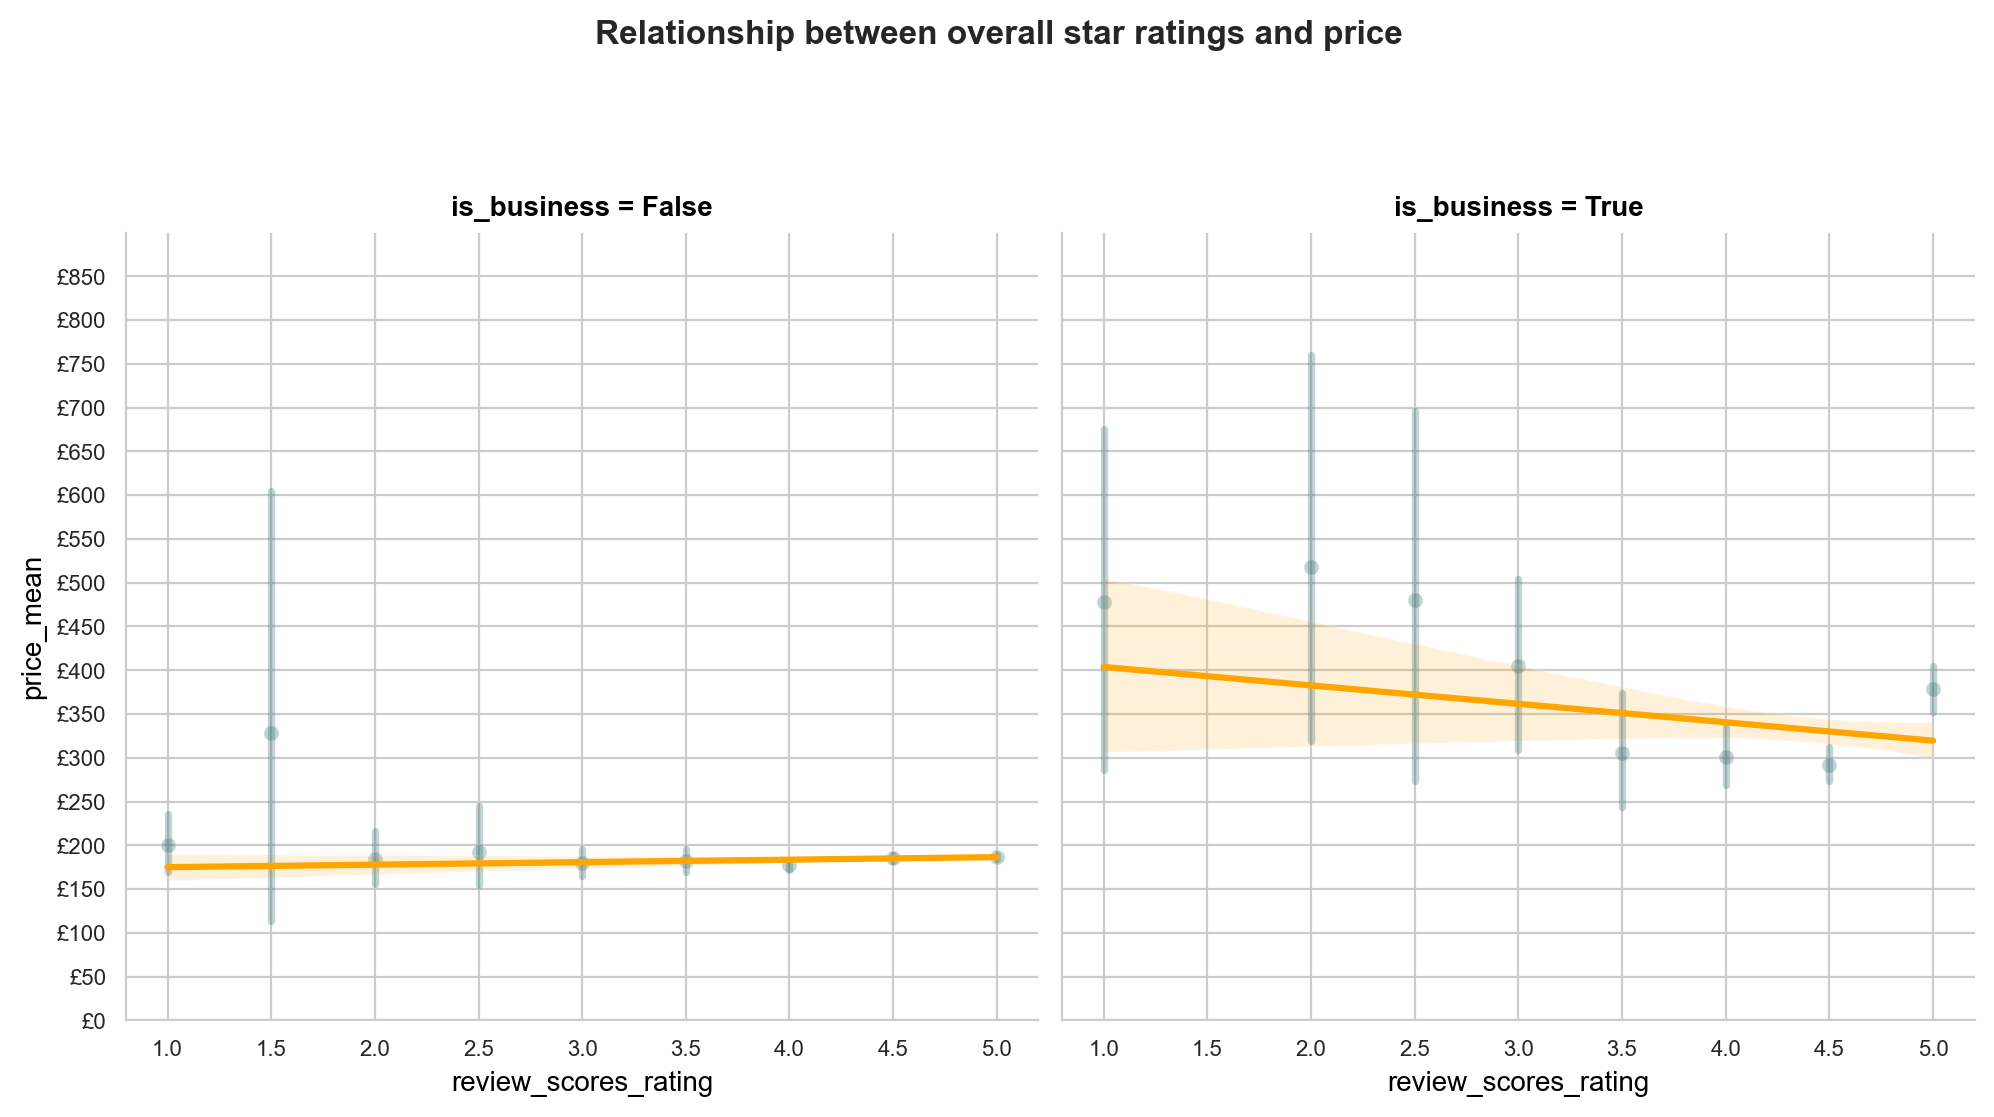

In [47]:
ticks = np.arange(0, 5.5, 0.5)
sns.lmplot(data=stars,
           x='review_scores_rating',
           y='price_mean',
           col='is_business',
           fit_reg=True,
           x_jitter=True,
           x_bins=ticks,
           scatter_kws={'alpha': 0.3,
                        's': 30,
                        'edgecolor': 'white',
                        'linewidths': 0.5,
                        'color': BASE_HIGHLIGHT_INTENSE},
           line_kws={'color': 'orange'})

yticks = np.arange(0, 900, 50)
ylabels = ['£{:1.0f}'.format(tick) for tick in yticks]
plt.yticks(yticks, ylabels)
plt.ylim(0, 900)

plt.suptitle('Relationship between overall star ratings and price', y=1.1)

plt.tight_layout()

>**Observation:** 
>- For individuals, we have now an slight upwards trend, stars increase for higher priced properties. 
>- For businesses, we have a downwards trend, with lots of variations in price for 1-3 stars varying between £300 and £750

In [48]:
# Let's remove businesses from the analysis due to its unpredicted pricing
# and much higher prices inflating averages
stars = stars.query('is_business == False')

#### Let's observe the trend by room type

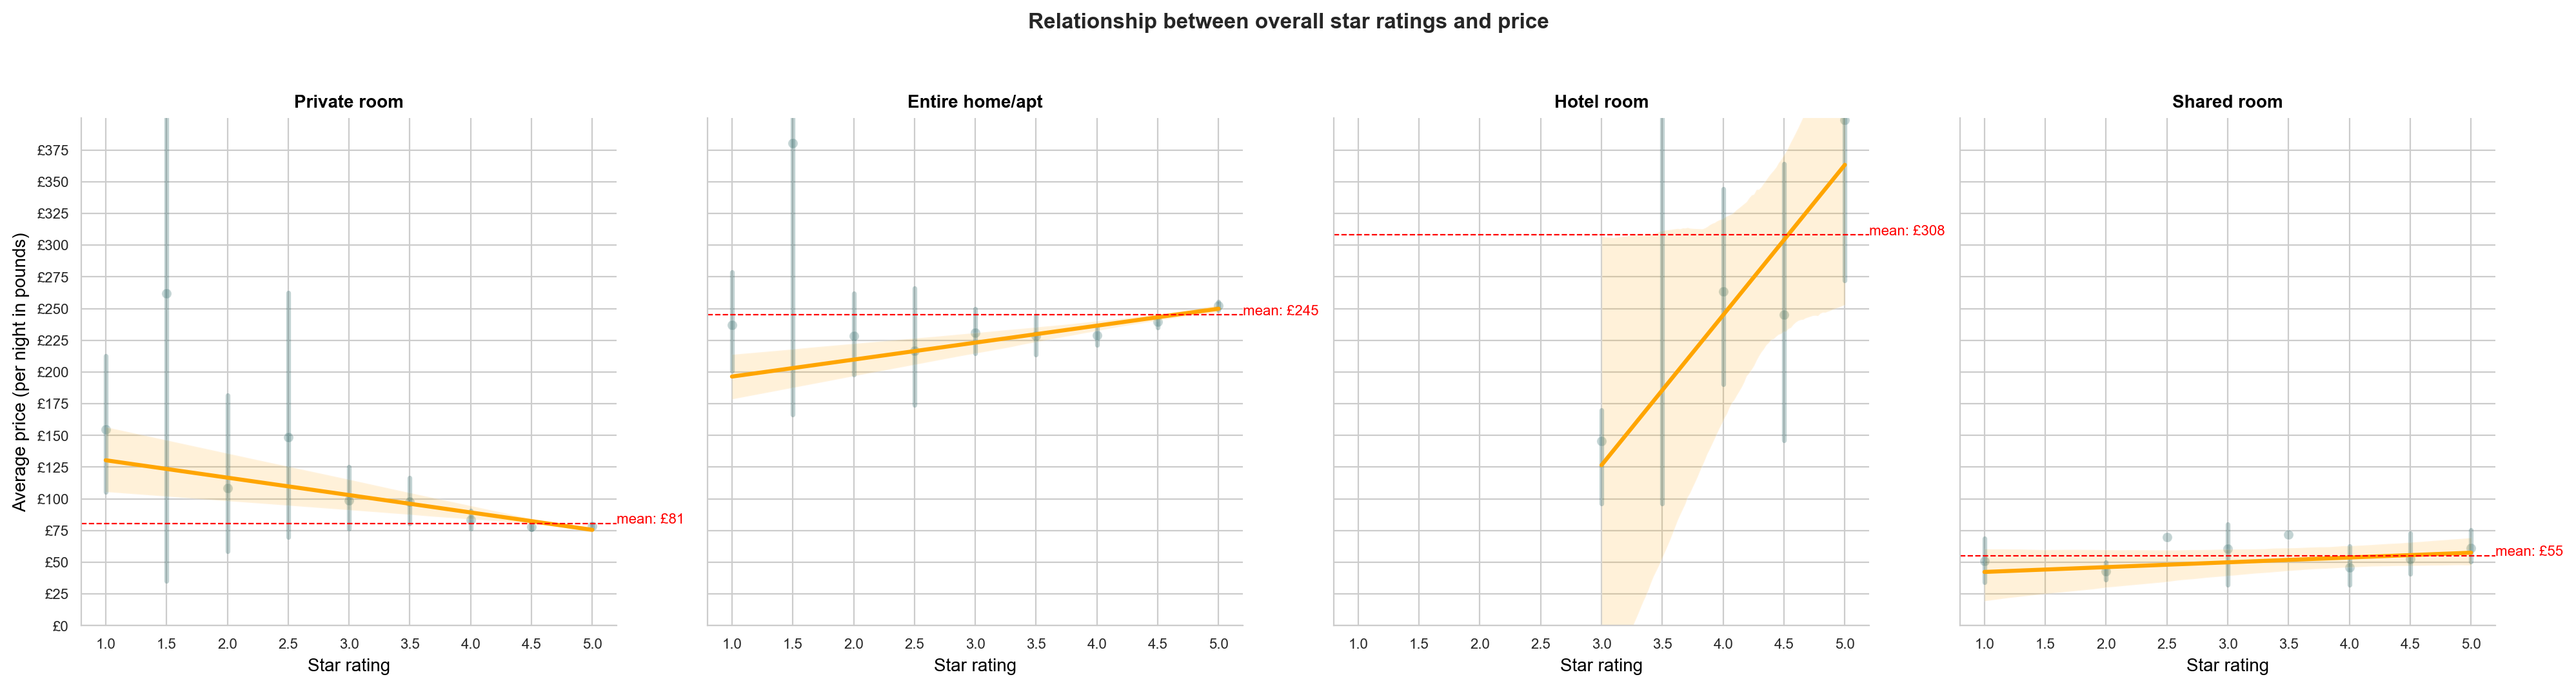

In [49]:
ticks = np.arange(0, 5.5, 0.5)
g = sns.lmplot(data=stars,
               x='review_scores_rating',
               y='price_mean',
               col='room_type',
               fit_reg=True,
               truncate=True,
               x_jitter=True,
               x_bins=ticks,
               scatter_kws={'alpha': 0.3,
                            's': 30,
                            'edgecolor': 'white',
                            'linewidths': 0.5,
                            'color': BASE_HIGHLIGHT_INTENSE},
               line_kws={'color': 'orange'})

g = g.map(vs.custom_mean_line, 'price_mean')

yticks = np.arange(0, 400, 25)
ylabels = ['£{:1.0f}'.format(tick) for tick in yticks]
plt.yticks(yticks, ylabels)
plt.ylim(0, 400)


g.set_axis_labels('Star rating',
                  'Average price (per night in pounds)')

g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.suptitle('Relationship between overall star ratings and price',
             y=1.05)

plt.tight_layout()

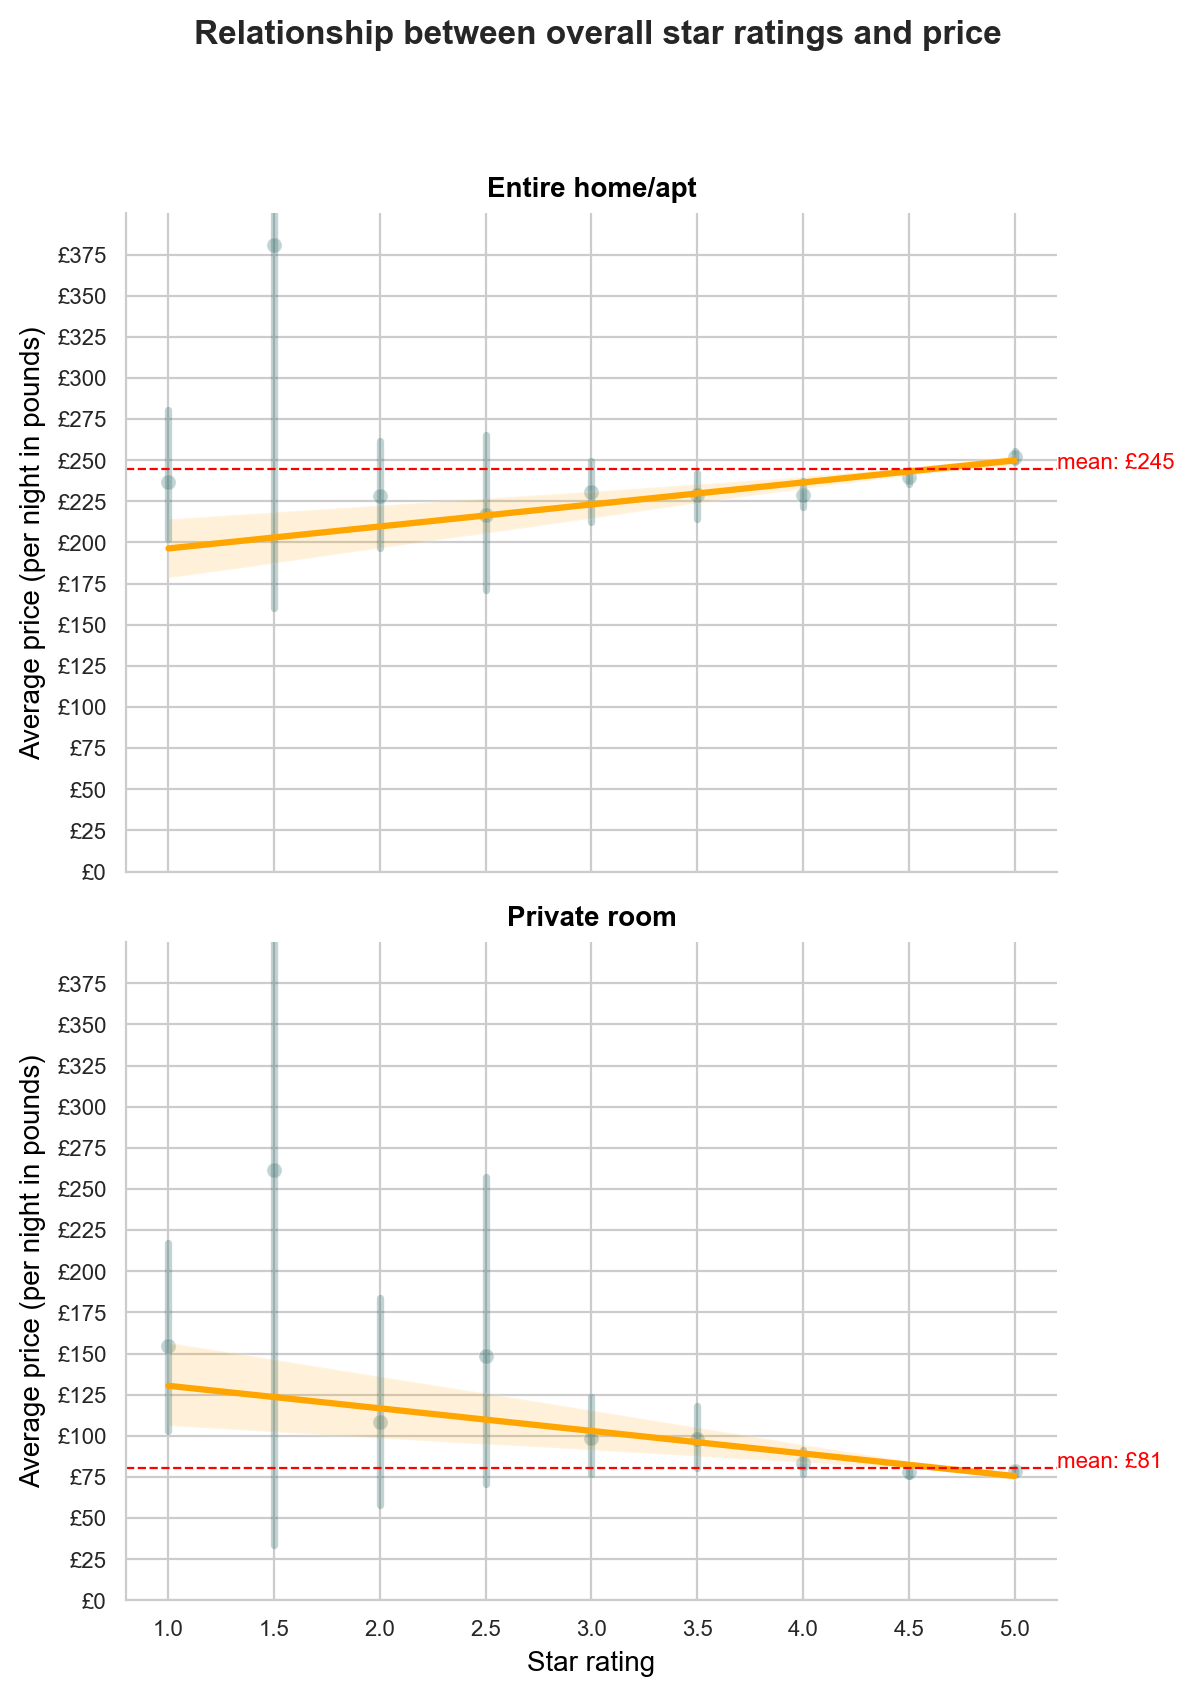

In [50]:
# Zoom and clean-up plot for blob
ticks = np.arange(0, 5.5, 0.5)
g = sns.lmplot(data=stars,
               x='review_scores_rating',
               y='price_mean',
               row='room_type',
               fit_reg=True,
               truncate=True,
               x_jitter=True,
               x_bins=ticks,
               row_order=['Entire home/apt', 'Private room'],
               height=4,
               aspect=1.5,
               scatter_kws={'alpha': 0.3,
                            's': 30,
                            'edgecolor': 'white',
                            'linewidths': 0.5,
                            'color': BASE_HIGHLIGHT_INTENSE},
               line_kws={'color': 'orange'})

g = g.map(vs.custom_mean_line, 'price_mean')

yticks = np.arange(0, 400, 25)
ylabels = ['£{:1.0f}'.format(tick) for tick in yticks]
plt.yticks(yticks, ylabels)
plt.ylim(0, 400)

g.set_axis_labels('Star rating',
                  'Average price (per night in pounds)')

g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.suptitle('Relationship between overall star ratings and price',
             y=1.05)

plt.tight_layout()

>**Observation:** We have different trends and behaviour for different room types
> - Entire home/apt and hotels are a more luxury market with a higher average mean around £240 per night. We definetely see an upwards trend from 2.5 stars onwards
> - Private rooms: are a budget market with a lower average mean of £85 per night. We definetely see an downwards trend from 2.5 stars onwards
> - 1-2 stars shows a lot of variation in behaviour

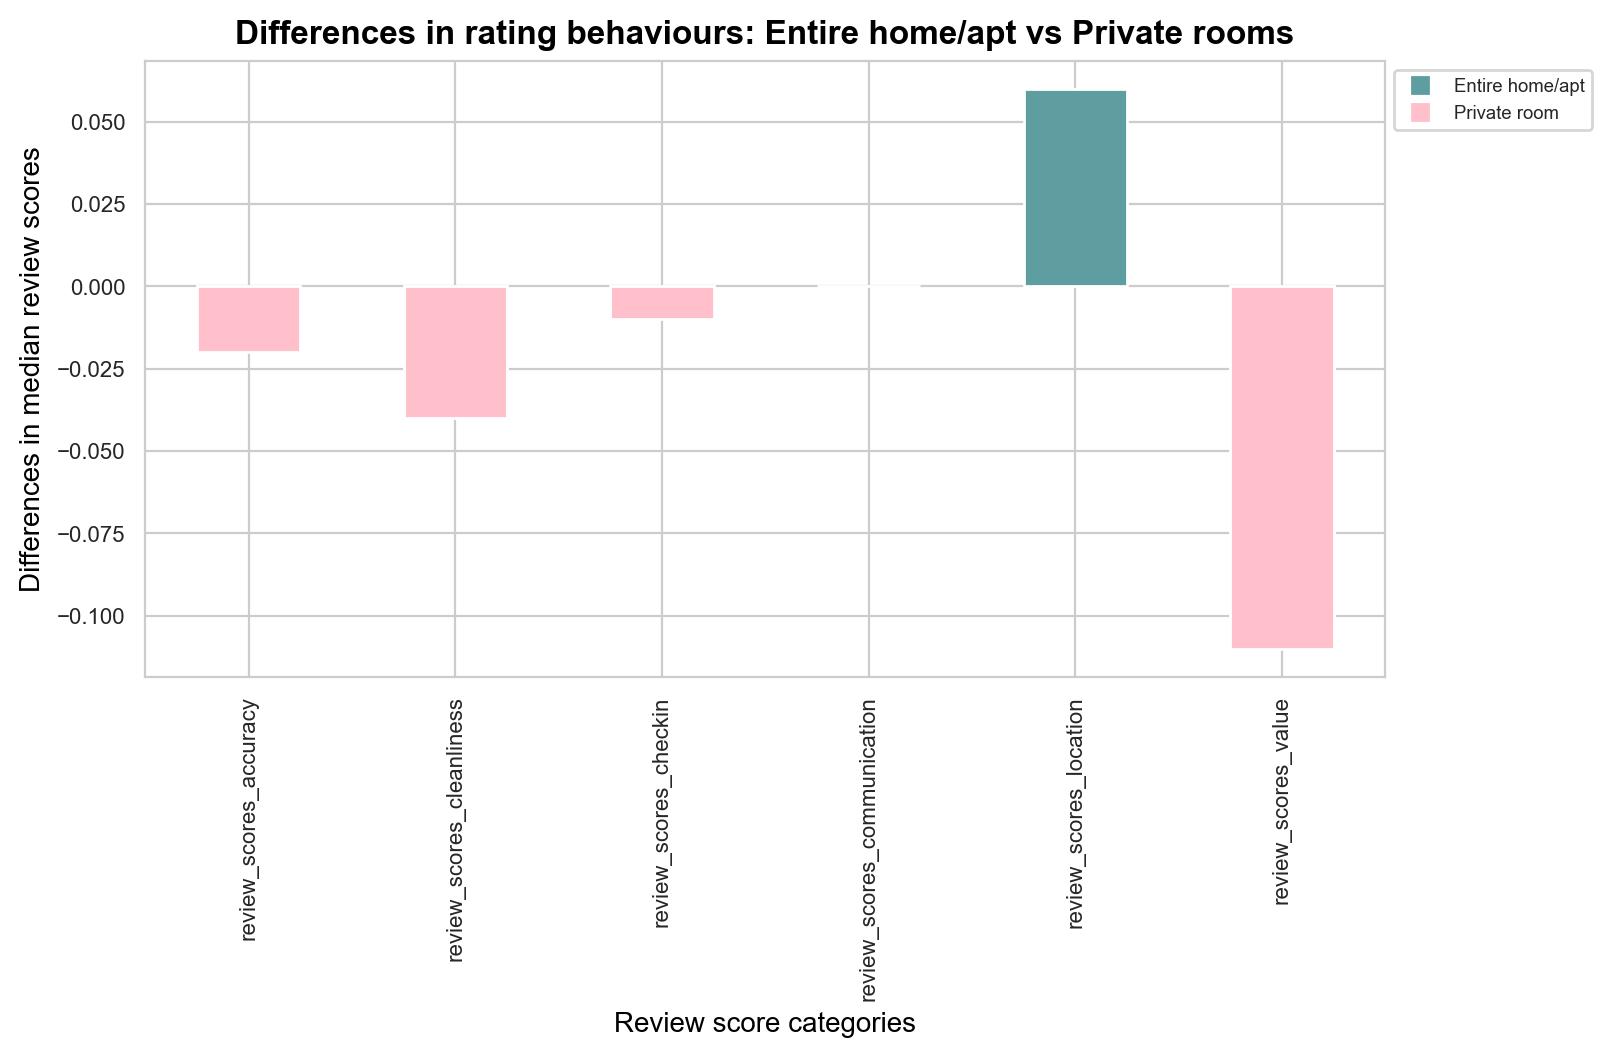

In [51]:
# what are the biggest differences in reviews
# between those renting entire places vs those renting private rooms
cols = ['review_scores_accuracy', 'review_scores_cleanliness',
        'review_scores_checkin', 'review_scores_communication',
        'review_scores_location', 'review_scores_value']

entire = stars[stars['room_type'] == 'Entire home/apt'][cols].copy(deep=True)
entire = entire.describe().T['50%']
private = stars[stars['room_type'] == 'Private room'][cols].copy(deep=True)
private = private.describe().T['50%']
diff = entire - private

pos = 'cadetblue'
neg = 'pink'

c = list[pos, neg]

ax = diff.plot(
    kind='bar',
    color=np.vectorize({True: pos, False: neg}.get)(diff > 0),
    label='')

# add a custom legend to complain the differences in voting behaviour
entire = mlines.Line2D([],
                       [],
                       color=pos,
                       marker='s',
                       ls='',
                       label='Entire home/apt')

private = mlines.Line2D([],
                        [],
                        color=neg,
                        marker='s',
                        ls='',
                        label='Private room')

plt.legend(handles=[entire, private],
           bbox_to_anchor=(1, 1),
           loc='upper left',
           fontsize='small',
           title_fontsize='large')

plt.title('Differences in rating behaviours: Entire home/apt vs Private rooms')
plt.ylabel('Differences in median review scores')
plt.xlabel('Review score categories')


plt.show()

In [52]:
# as star ratings below 3 have lots of variation,
# lets for now analyse star ratings 3 and above
stars = stars[stars['review_scores_rating'] >= 3]

In [53]:
# Get top rooms
rooms = stars.room_type.value_counts()[:2]
rooms

room_type
Entire home/apt    28574
Private room       16124
Name: count, dtype: int64

In [54]:
# Get top neighbourhoods
neighbourhoods = stars.neighbourhood_cleansed.value_counts()[:10]
neighbourhoods

neighbourhood_cleansed
Westminster               5297
Tower Hamlets             3435
Camden                    3265
Hackney                   2961
Kensington and Chelsea    2957
Southwark                 2536
Lambeth                   2387
Islington                 2316
Wandsworth                2137
Hammersmith and Fulham    1969
Name: count, dtype: int64

####  A deeper look at Private rooms, why the downward trend ?

In [55]:
tmp = stars[stars['room_type'] == 'Private room']

# Get top properties
properties = tmp.property_type.value_counts(normalize=True)[:4]
properties

property_type
Private room in rental unit    0.340796
Private room in home           0.337199
Private room in condo          0.164599
Private room in townhouse      0.062019
Name: proportion, dtype: float64

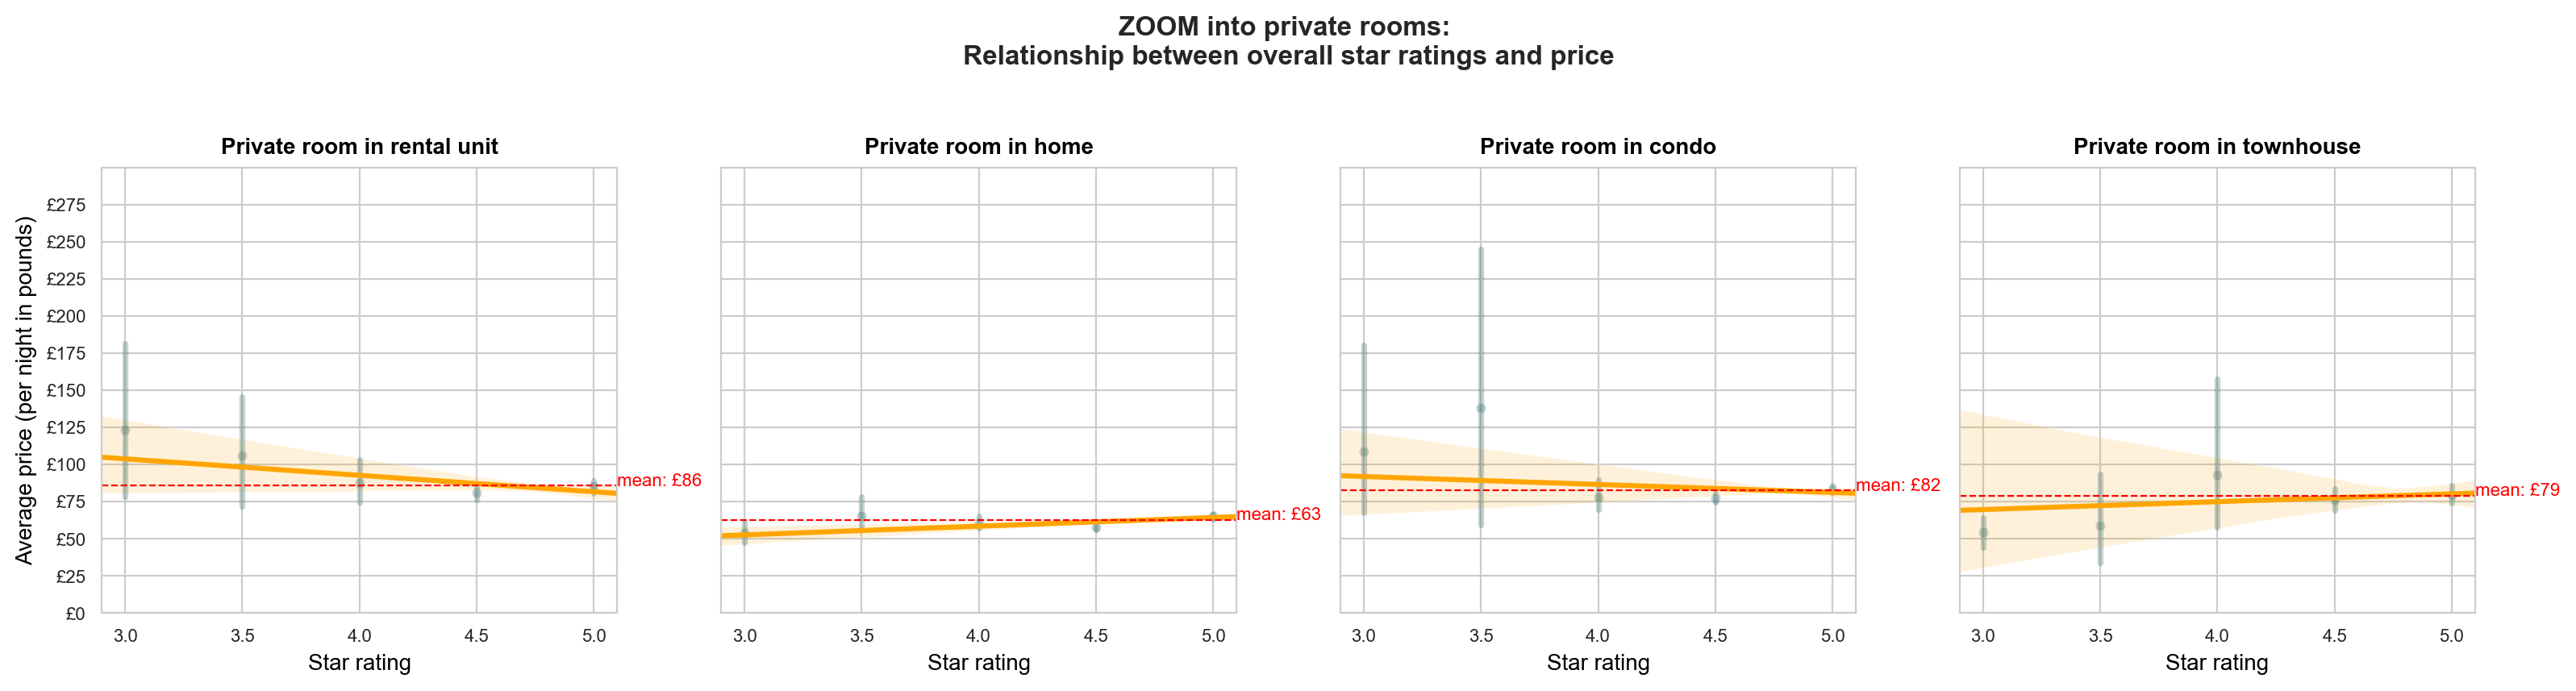

In [56]:
# property FacedGrid plot

text1 = 'ZOOM into private rooms: '
text2 = 'Relationship between overall star ratings and price'

vs.plot_star_ratings(
    data=tmp,
    col='property_type',
    col_order=properties.index,
    x='review_scores_rating',
    y='price_mean',
    x_lim=[3, 5.5, 0.5],
    y_lim=[0, 300, 25],
    suptitle=(text1 + '\n' + text2),
)

>**Observation:** 

>- Again I observe different behaviour by property type, with a mixture of upwards and downward trends
>- Private room in rental unit and condo have a downwards trend and makes up 50% of the overall private room data

#### Neighbourhood analysis - Lets compare room type behaviour in the same neighbourhood

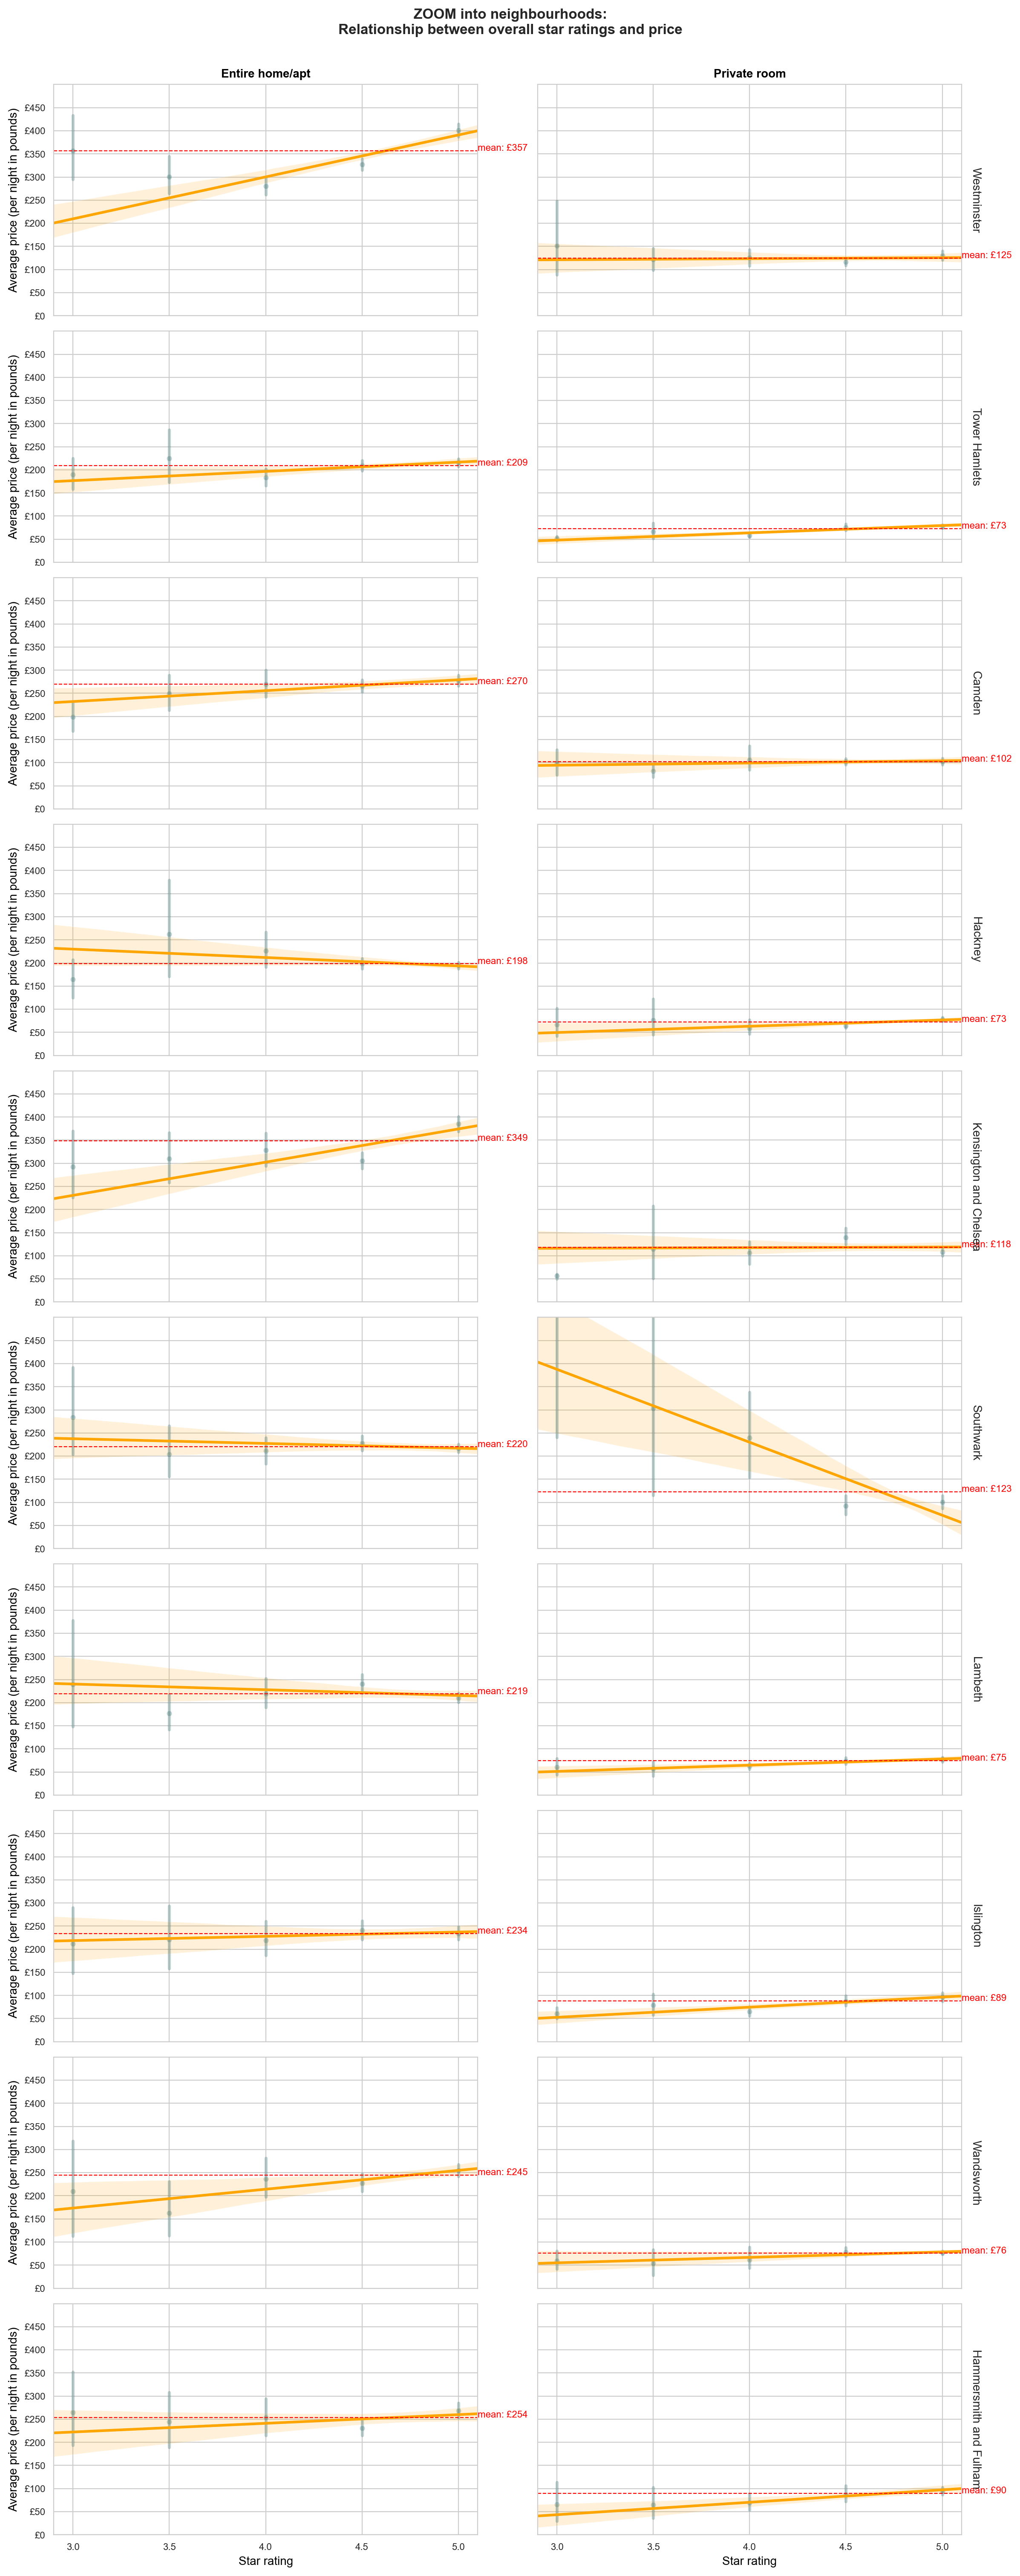

In [57]:
# room type and neighbourhoood FacedGrid plot

text1 = 'ZOOM into neighbourhoods:'
text2 = 'Relationship between overall star ratings and price'

vs.plot_star_ratings(
    data=stars,
    col='room_type',
    col_order=rooms.index,
    x='review_scores_rating',
    y='price_mean',
    x_lim=[3, 5.5, 0.5],
    y_lim=[0, 500, 50],
    suptitle=(text1 + '\n' + text2),
    row='neighbourhood_cleansed',
    row_order=neighbourhoods.index,
    col_wrap=None,
    height=3,
    aspect=2,
    suptitle_offset=1.005
)

>**Observation:** 
>- At neighbourhood level, we see a lot of mixed behaviour and not easy to draw a clear conclusion. It's not so useful going down to neighbourhood level

#### Let's zoom into 1 property type per room type, 1 neighbourhood and review star rating behaviour

In [58]:
# Get top private property
top_private = list(stars[stars['room_type'] == 'Private room']
                   .property_type.value_counts()[:1].index)
top_private

['Private room in rental unit']

In [59]:
# Get top entire home/apt property
top_entire = list(stars[stars['room_type'] == 'Entire home/apt']
                  .property_type.value_counts(normalize=False)[:1].index)

In [60]:
top_properties = top_entire + top_private
top_properties

['Entire rental unit', 'Private room in rental unit']

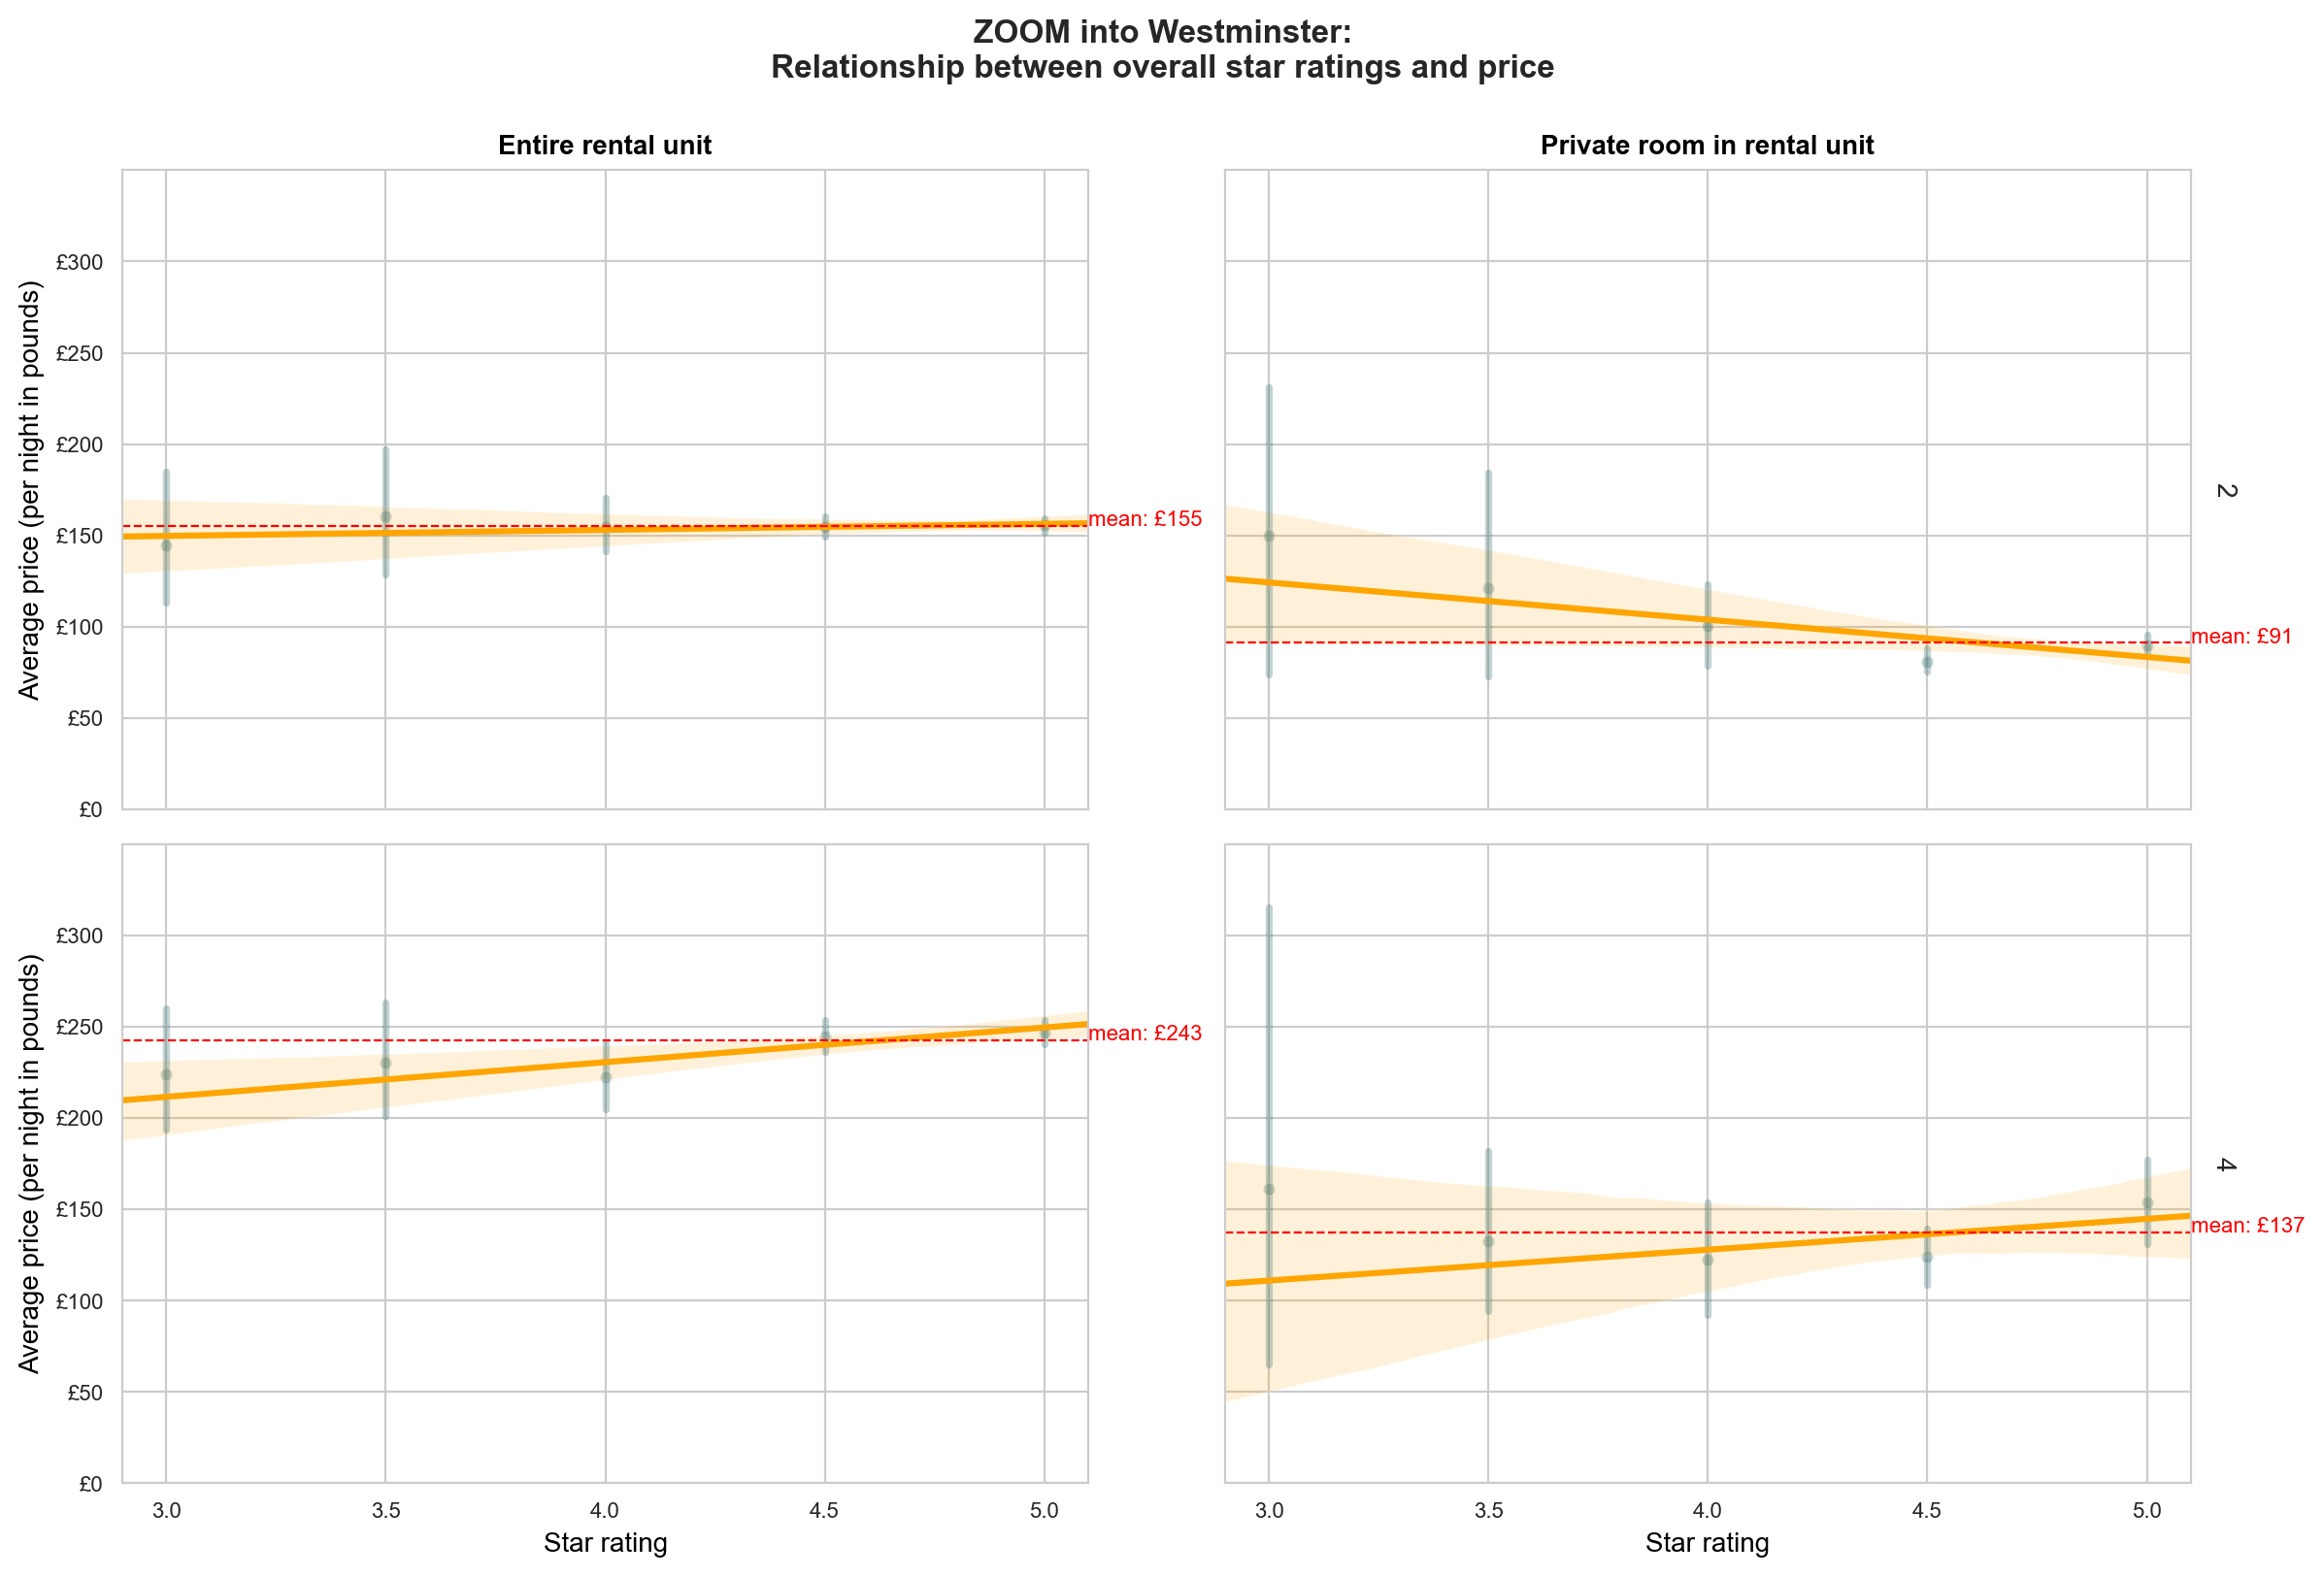

In [61]:
stars_filtered = stars.query('neighbourhood_cleansed == "Westminstser"')

# room type and neighbourhoood FacedGrid plot
text1 = 'ZOOM into Westminster:'
text2 = 'Relationship between overall star ratings and price'

vs.plot_star_ratings(
    data=stars,
    col='property_type',
    col_order=top_properties,
    x='review_scores_rating',
    y='price_mean',
    x_lim=[3, 5.5, 0.5],
    y_lim=[0, 350, 50],
    suptitle=(text1 + '\n' + text2),
    row='accommodates',
    row_order=[2, 4],
    col_wrap=None,
    height=4,
    aspect=1.5,
    suptitle_offset=1.005
)

**Observation:** 
> - For entire rentals, the 5-star rating stay high as the price increase
> - For shared rooms, 5-star ratings decrease as price increase

<a id='conclusions'></a>
<span style="color:blue; font-size:30px; line-height:40px; font-family: Calibri;">Conclusions</span>

<blockquote>

**Main findings:**
    
Renting from superhosts brings peace of mind, but be aware the price are likely to be slightly higher

There is not conclusive evidence that higher star ratings cause consumers to pay more for similar rentals in the same area. It's more a case of consumer behaviour between budget and luxury markets. 

Those renting more luxury properties like entire homes/apt, gives higher star ratings for higher priced properties, same as the overall trend.
However, those renting budget properties like private rooms, gives higher star ratings for lower prices, causing a downward trend.
These are 2 very different consumer behaviours.

When comparing the star ratings for entire homes/apt vs private rooms, we can see those renting entire homes/apt values location the most, whilst the budget group renting private rooms, values price and cleaniness the most.
    
</blockquote>

<a id='submission'></a>
<span style="color:blue; font-size:30px; line-height:40px; font-family: Calibri;">Submission</span>

In [62]:
# convert notebook to html
os.system('jupyter nbconvert --to html 3_Host_and_Star_Analysis.ipynb')

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook 3_Host_and_Star_Analysis.ipynb to html
[NbConvertApp] Writing 4263424 bytes to 3_Host_and_Star_Analysis.html


0